---
title: INICIALIZAR LABELS
format: 
  pdf:
    toc: false
    geometry: margin=1in, landscape, legalpaper
  html:
    toc: true
jupyter:
  jupytext:
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.17.2
  kernelspec:
    display_name: Python 3
    language: python
    name: python3
---


In [ ]:
import pandas as pd

# Etiquetas separadas por punto y coma
labels =
  "Marital status;Application mode;Application order;Course;Daytime/evening attendance;\
  Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;\
  Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;\
  Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;\
  Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);\
  Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);\
  Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);\
  Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);\
  Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"

# Convertir etiquetas en lista
column_names = labels.split(";")

# Cargar el archivo CSV sin encabezados
ruta_archivo = "Data_fil.csv"  # Reemplaza con la ruta real de tu archivo
Data_fil = pd.read_csv(ruta_archivo, header=None, names=column_names)

# Guardar el nuevo DataFrame con encabezados en un nuevo archivo CSV
archivo_salida = "archivo_con_labels.csv"
Data_fil.to_csv(archivo_salida, index=False)

# Imprimir el contenido del nuevo archivo para verificar
df_verificado = pd.read_csv(archivo_salida)
print(df_verificado.head())

   Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9500   
1               1                43                  1    9500   
2               1                 1                  1    9773   
3               1                17                  2    9254   
4               1                17                  1    9070   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           132.0            1                      19   
1                           120.0            1                       1   
2                           150.0     

# EDAS EXPLORATORIO INICIAL BASE SIN LIMPIAR

Vista general del dataset:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0          1          1          1       9500          1          1   
1          1         43          1       9500          1          1   
2          1          1          1       9773          1          1   
3          1         17          2       9254          1          1   
4          1         17          1       9070          1          1   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_27  Feature_28  \
0      132.0          1         19          1  ...           0           8   
1      120.0          1          1          1  ...           0           8   
2      150.0          1         19         38  ...           0           6   
3      141.0          1          1          4  ...           0           6   
4      119.0          1         38         19  ...           0           6   

   Feature_29  Feature_30  Feature_31  Feature_32  Feature_33  Feature_34  \


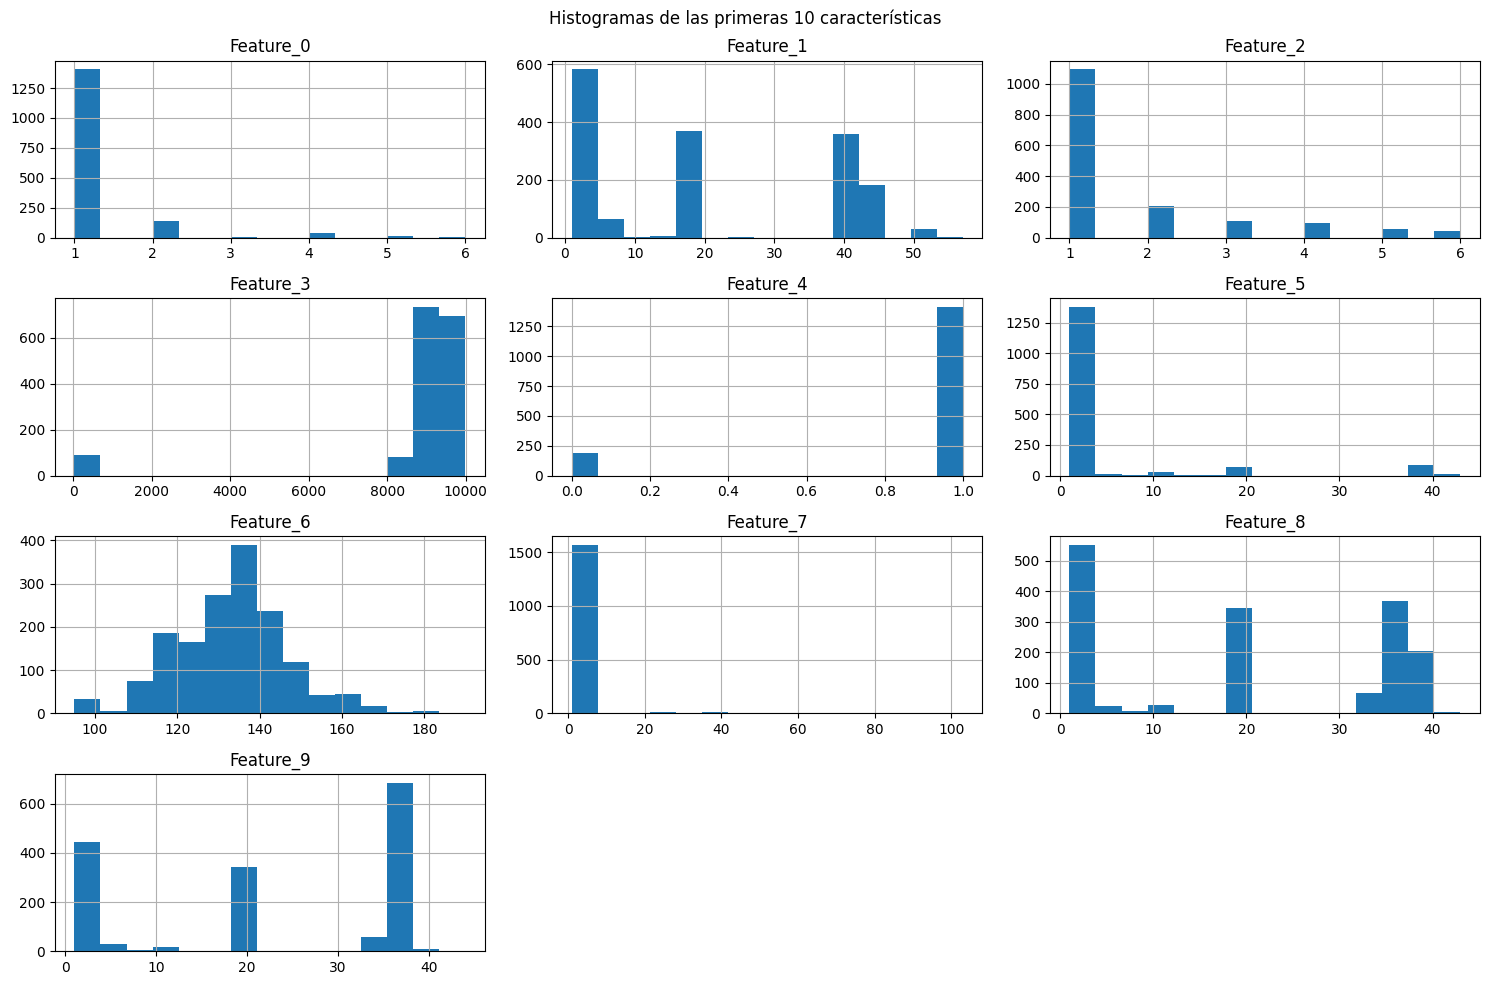


Distribución de la variable objetivo:
Target
Graduate    800
Dropout     800
Name: count, dtype: int64


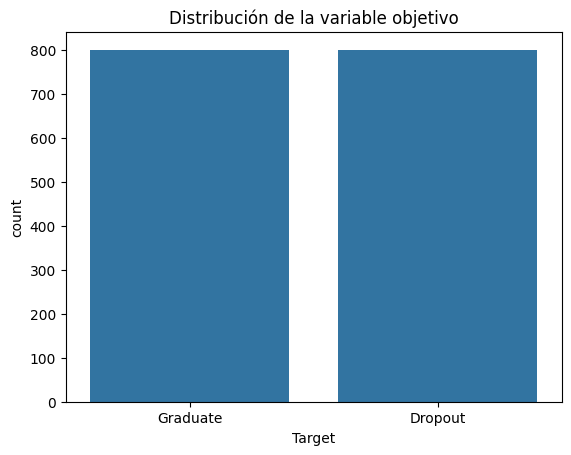

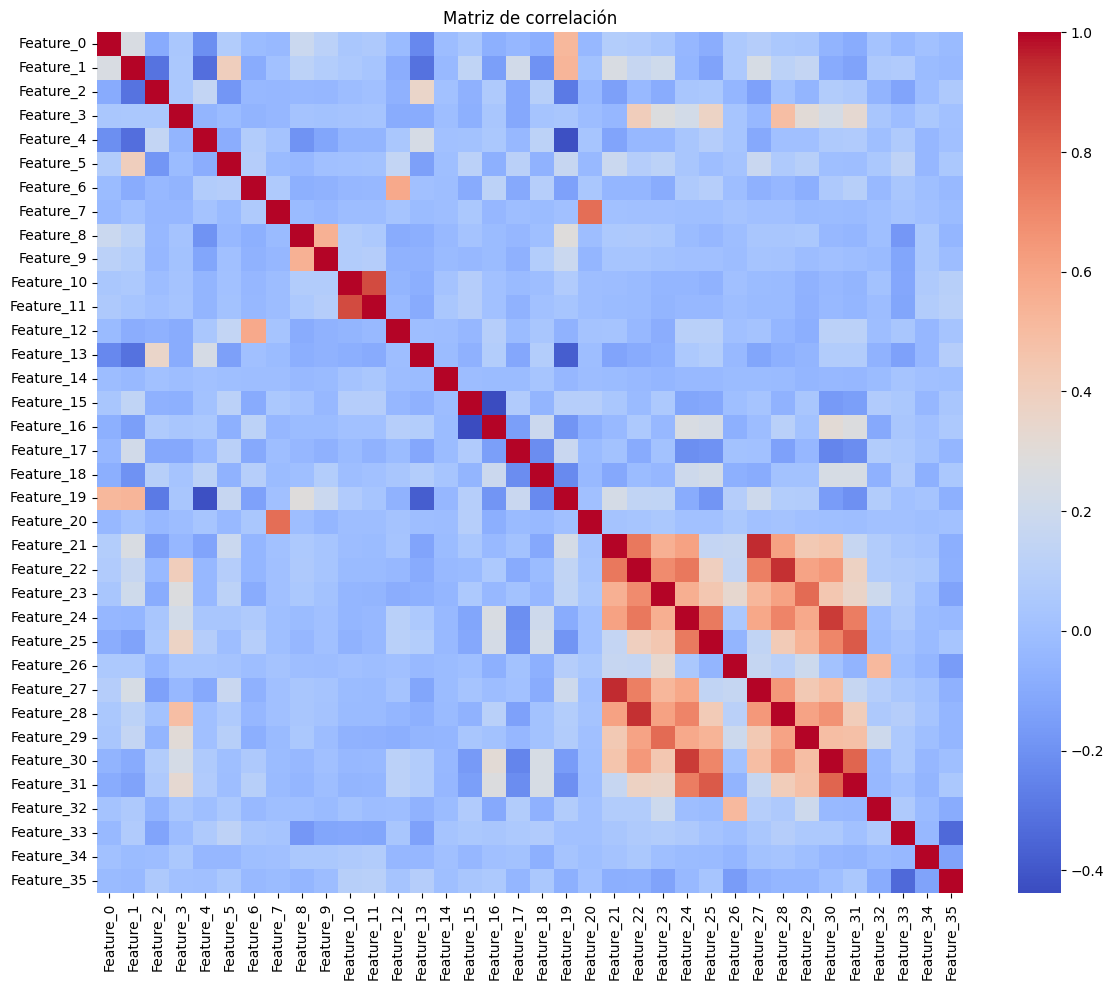

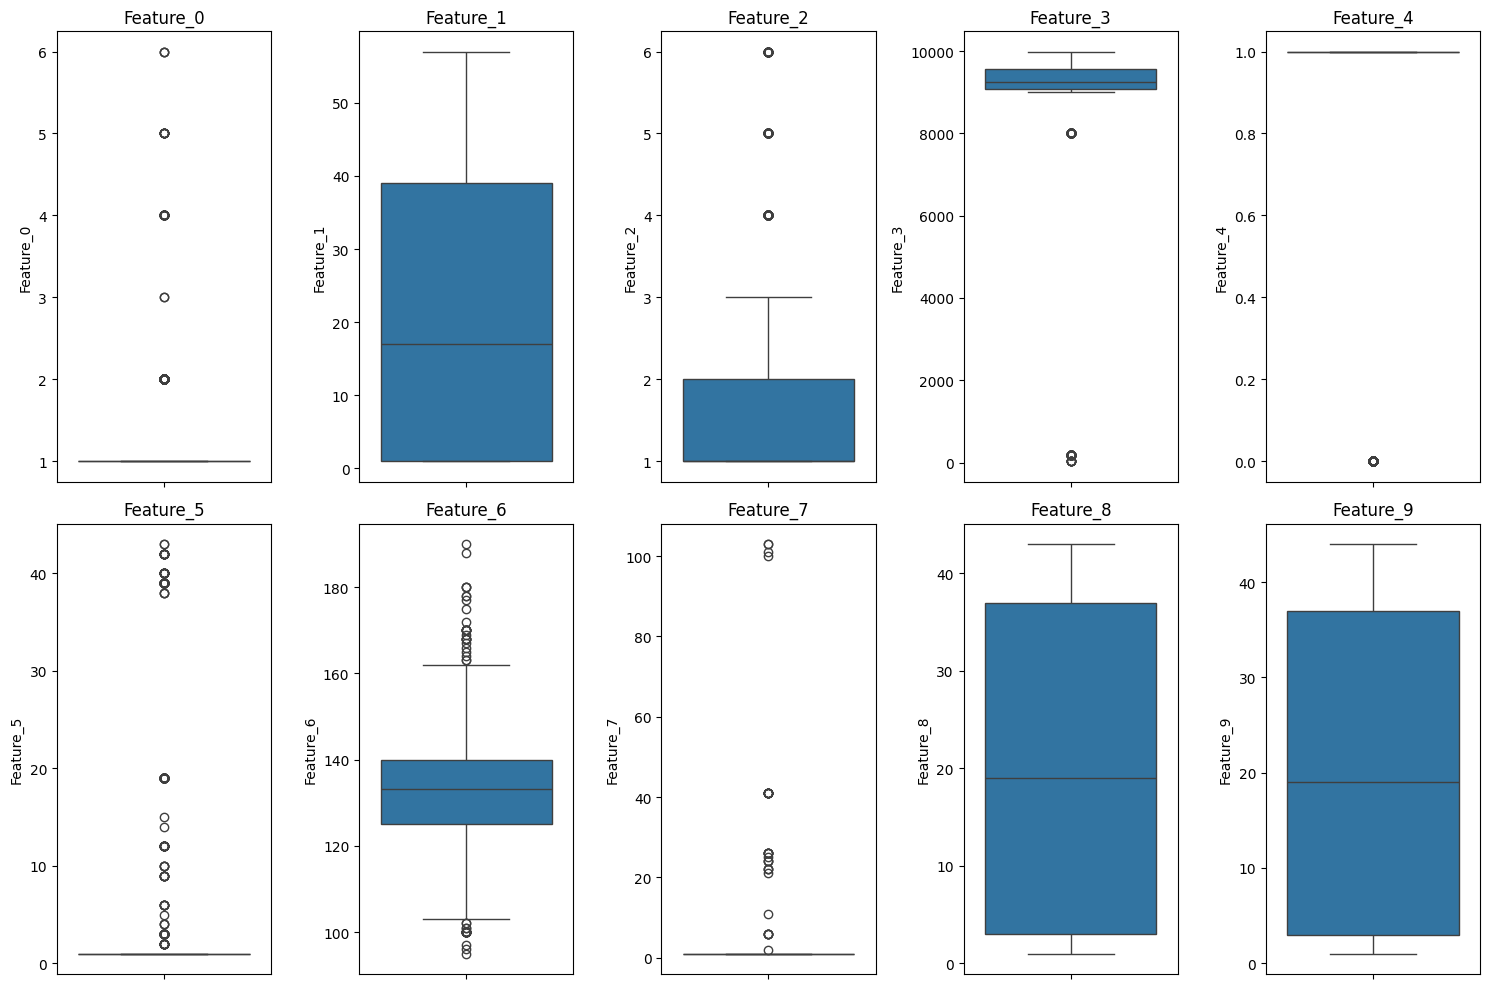

In [ ]:
# Análisis Exploratorio de Datos - sonar.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
df = pd.read_csv("Data_fil.csv", header=None)

# Asignar nombres de columnas
df.columns = [f"Feature_{i}" for i in range(36)] + ["Target"]

# Vista general del dataset
print("Vista general del dataset:")
print(df.head())
print("\nForma del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Histograma de las primeras 10 características
df.iloc[:, :10].hist(figsize=(15, 10), bins=15)
plt.suptitle("Histogramas de las primeras 10 características")
plt.tight_layout()
plt.show()

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(df["Target"].value_counts())

sns.countplot(x="Target", data=df)
plt.title("Distribución de la variable objetivo")
plt.show()

# Matriz de correlación
corr_matrix = df.iloc[:, :-1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

# Boxplots de las primeras 10 características
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[f"Feature_{i}"])
    plt.title(f"Feature_{i}")
plt.tight_layout()
plt.show()

## Reducción de dimensionalidad con PCA
#X = df.iloc[:, :-1]
#y = df["Target"]

## Estandarizar los datos
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Aplicar PCA
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_scaled)

# Visualización PCA
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1")
#plt.title("Visualización PCA (2 componentes)")
#plt.xlabel("PCA 1")
#plt.ylabel("PCA 2")
#plt.show()

# PRUEBA QUANTTILE TRASNFORMER


=== Visualización de datos originales ===


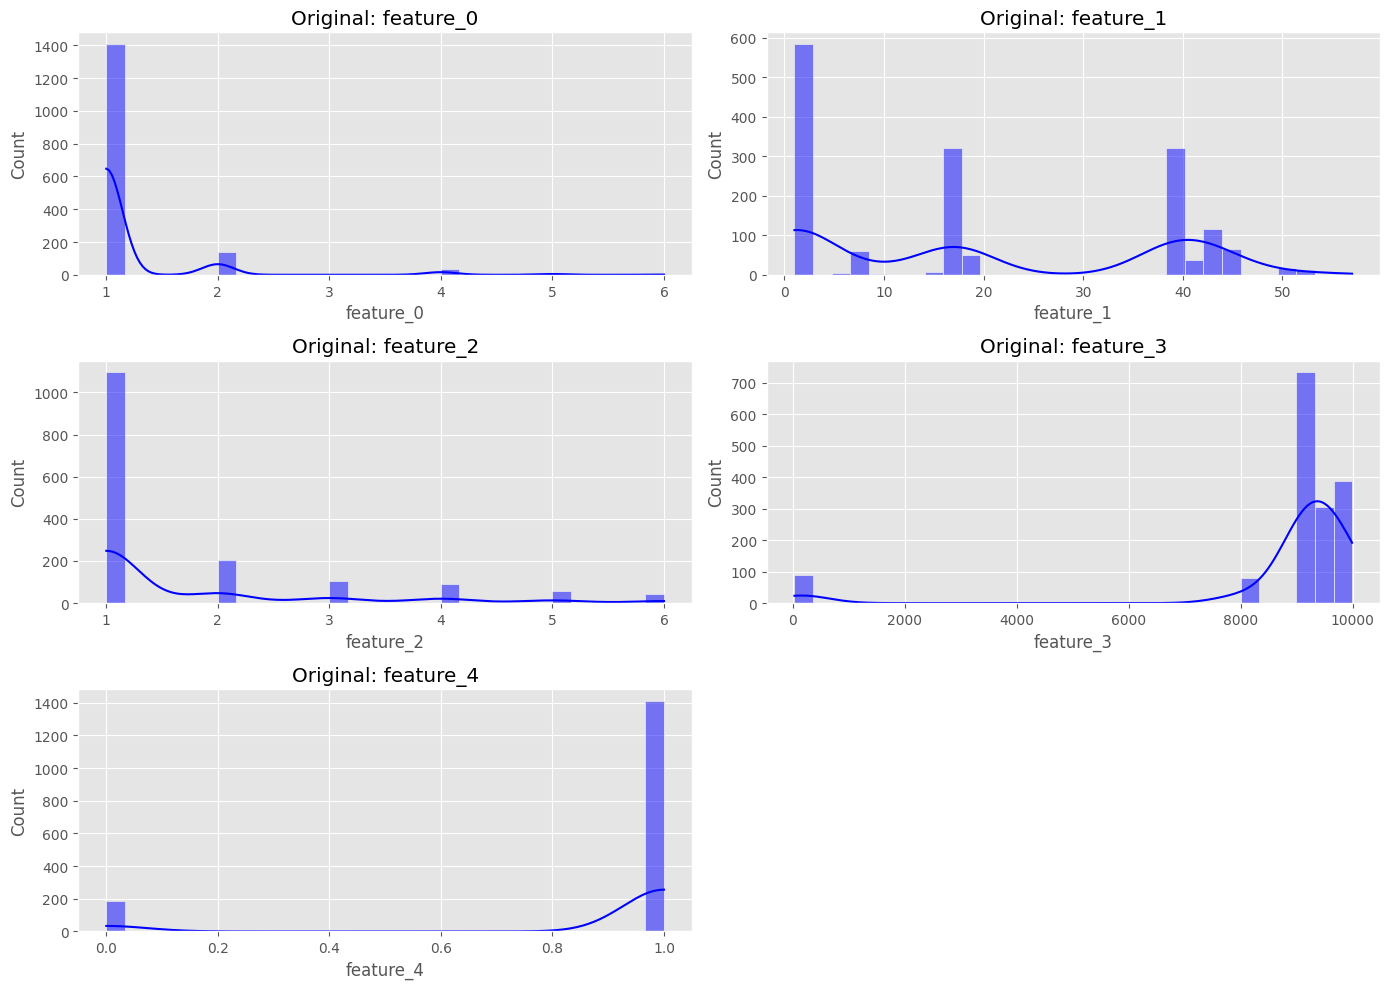


=== Visualización de datos transformados ===


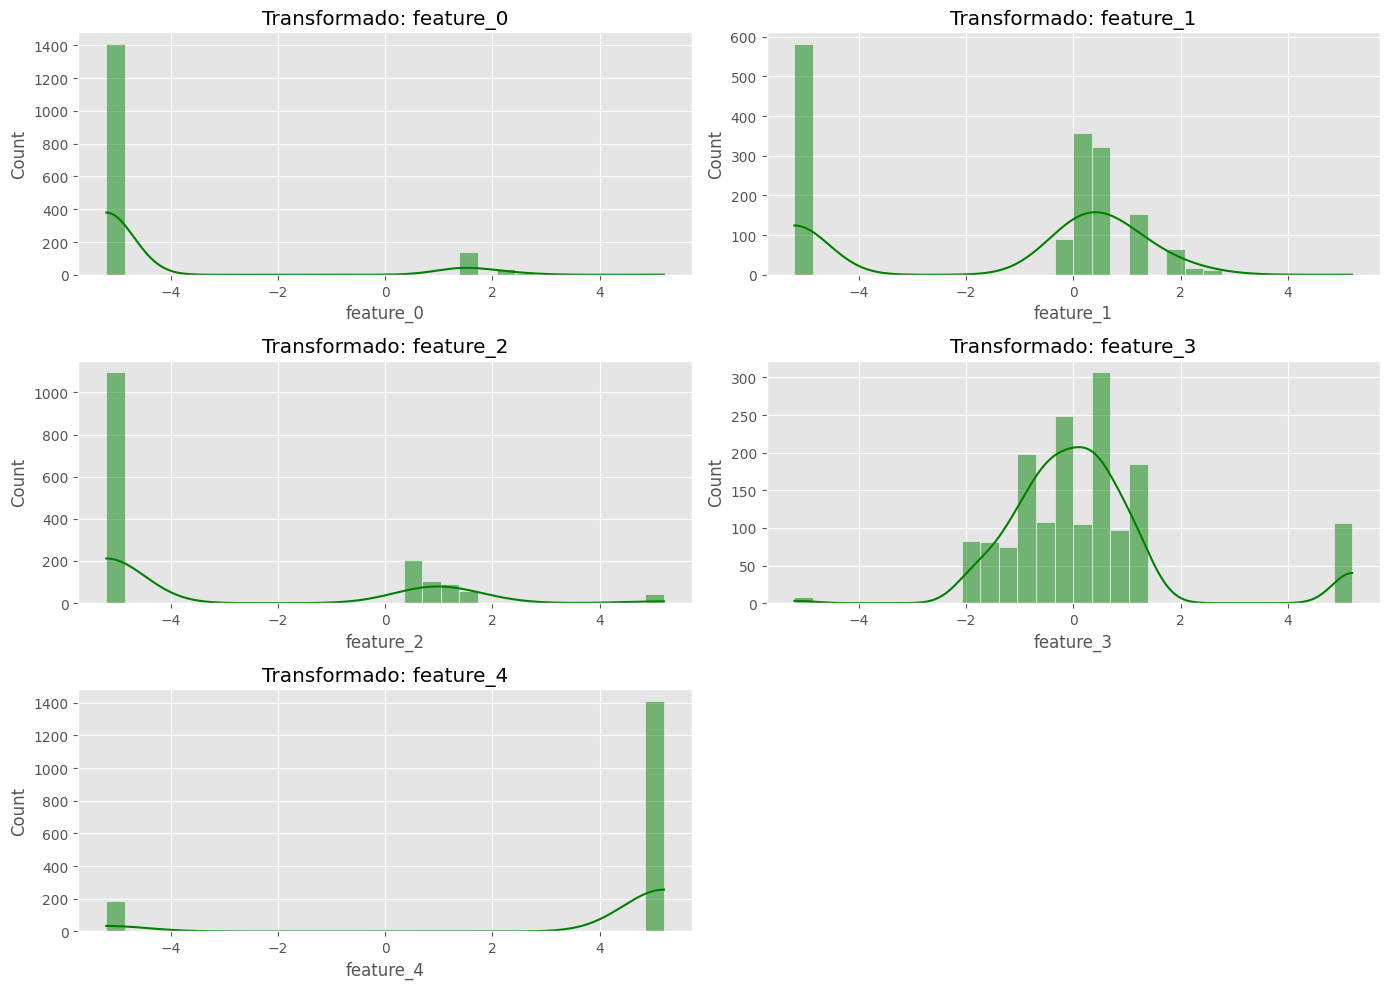


=== Comparación antes/después ===


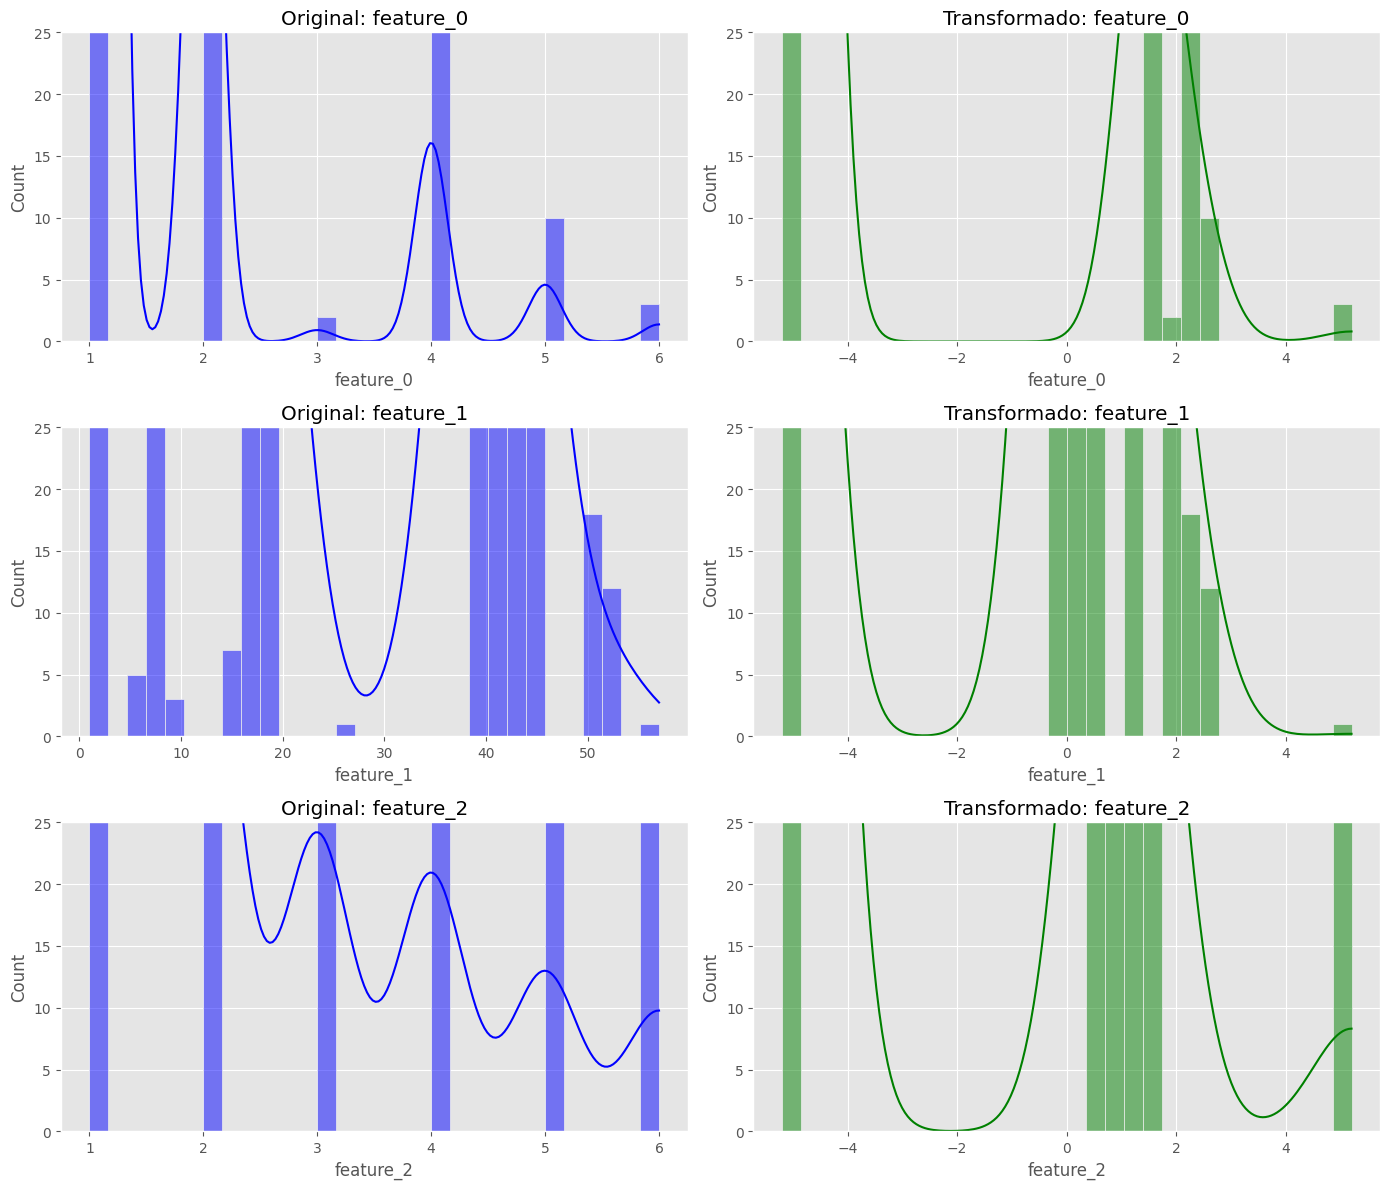


Resultados guardados en: Data_fil_results/
- original_data.csv
- transformed_data.csv
- original_distributions.png
- transformed_distributions.png
- comparison_distributions.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
import os

# Configuración de estilo
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
output_dir = 'Data_fil_results'
os.makedirs(output_dir, exist_ok=True)

# Cargar el archivo CSV sin encabezados
df = pd.read_csv("Data_fil.csv", header=None)

# Detectar número total de columnas
num_columns = df.shape[1]

# Asignar nombres de columnas dinámicamente
feature_columns = [f'feature_{i}' for i in range(num_columns - 1)]
df.columns = feature_columns + ['target']

# Guardar datos originales
df.to_csv(f'{output_dir}/original_data.csv', index=False)

# Visualización de datos originales (primeras 5 características)
print("\n=== Visualización de datos originales ===")
plt.figure(figsize=(14, 10))
for i, col in enumerate(feature_columns[:5]):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Original: {col}')
plt.tight_layout()
plt.savefig(f'{output_dir}/original_distributions.png')
plt.show()

# Aplicación de QuantileTransformer
X = df[feature_columns]
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=42)
X_trans = qt.fit_transform(X)
X_trans_df = pd.DataFrame(X_trans, columns=feature_columns)

# Añadir target y guardar datos transformados
transformed_df = X_trans_df.copy()
transformed_df['target'] = df['target']
transformed_df.to_csv(f'{output_dir}/transformed_data.csv', index=False)

# Visualización de datos transformados (primeras 5 características)
print("\n=== Visualización de datos transformados ===")
plt.figure(figsize=(14, 10))
for i, col in enumerate(feature_columns[:5]):
    plt.subplot(3, 2, i+1)
    sns.histplot(X_trans_df[col], kde=True, bins=30, color='green')
    plt.title(f'Transformado: {col}')
plt.tight_layout()
plt.savefig(f'{output_dir}/transformed_distributions.png')
plt.show()

# Comparación lado a lado (primeras 3 características)
print("\n=== Comparación antes/después ===")
plt.figure(figsize=(14, 12))
for i, col in enumerate(feature_columns[:3]):
    # Original
    plt.subplot(3, 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Original: {col}')
    plt.ylim(0, 25)

    # Transformado
    plt.subplot(3, 2, 2*i+2)
    sns.histplot(X_trans_df[col], kde=True, bins=30, color='green')
    plt.title(f'Transformado: {col}')
    plt.ylim(0, 25)

plt.tight_layout()
plt.savefig(f'{output_dir}/comparison_distributions.png')
plt.show()

# Mensaje final
print(f"\nResultados guardados en: {output_dir}/")
print("- original_data.csv")
print("- transformed_data.csv")
print("- original_distributions.png")
print("- transformed_distributions.png")
print("- comparison_distributions.png")

# PRUEBA 2

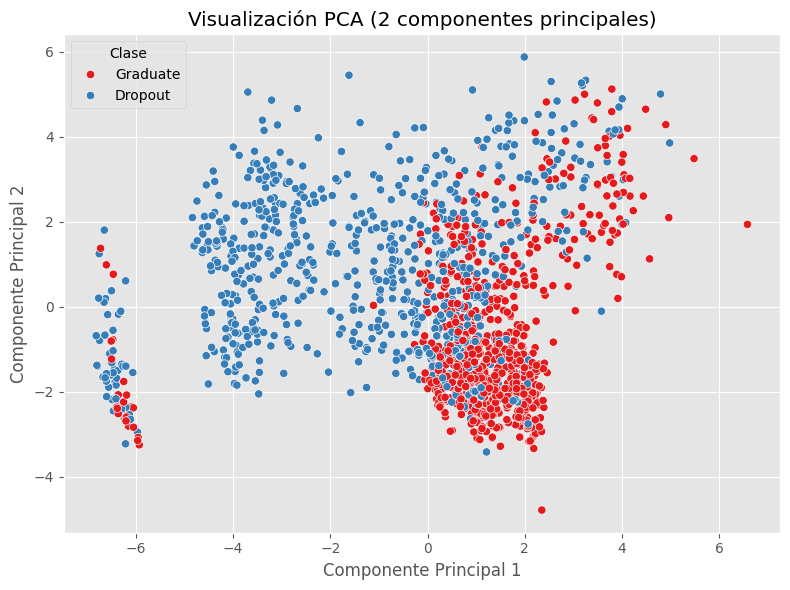

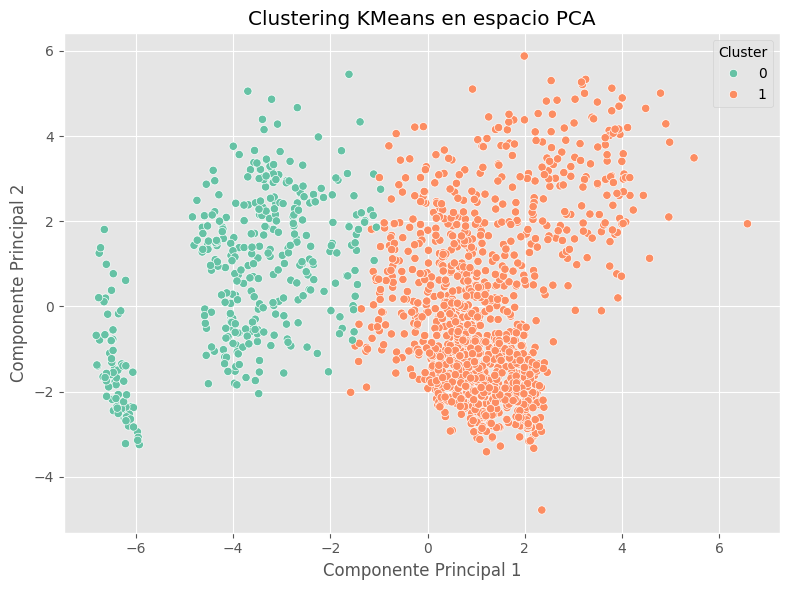

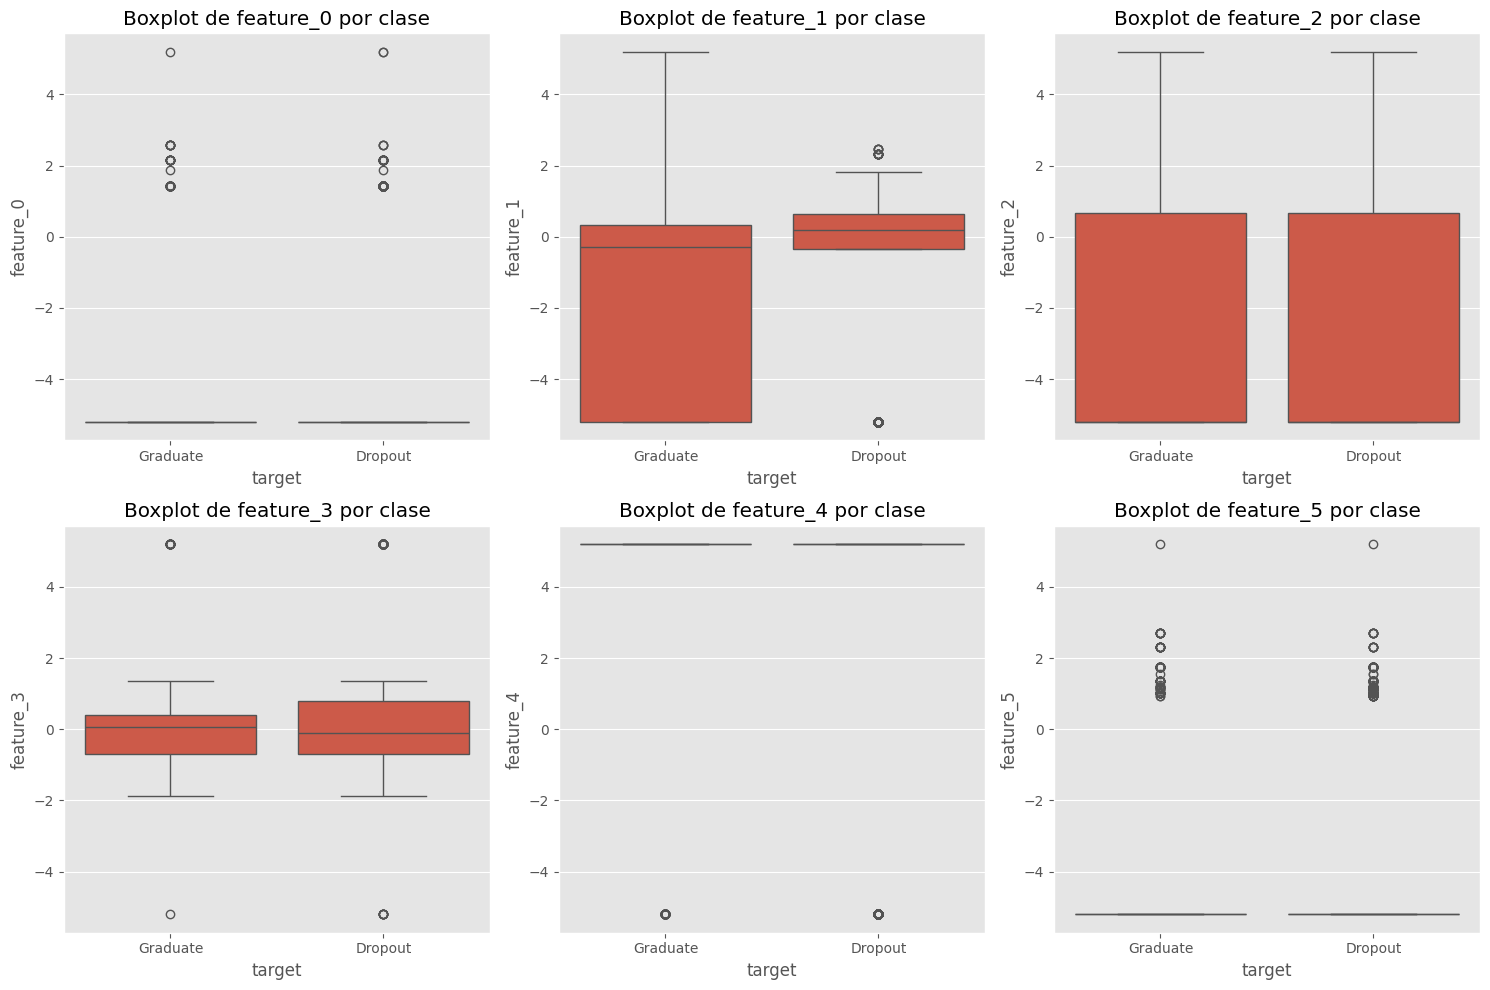

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar el archivo CSV
df = pd.read_csv("Data_fil_results/transformed_data.csv")

# Separar características y variable objetivo
X = df.drop("target", axis=1)
y = df["target"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de los dos primeros componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1")
plt.title("Visualización PCA (2 componentes principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.tight_layout()
plt.show()

# Clustering con KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualización de clusters en el espacio PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2")
plt.title("Clustering KMeans en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers en algunas variables
selected_features = X.columns[:6]  # Puedes ajustar el número de variables
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y, y=df[feature])
    plt.title(f"Boxplot de {feature} por clase")
plt.tight_layout()
plt.show()

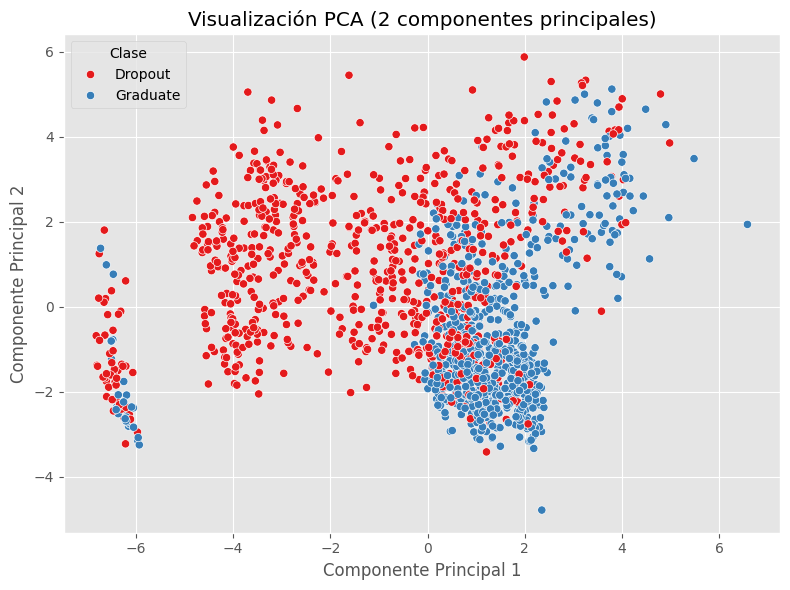

Archivo 'clustered_output.csv' guardado con éxito.


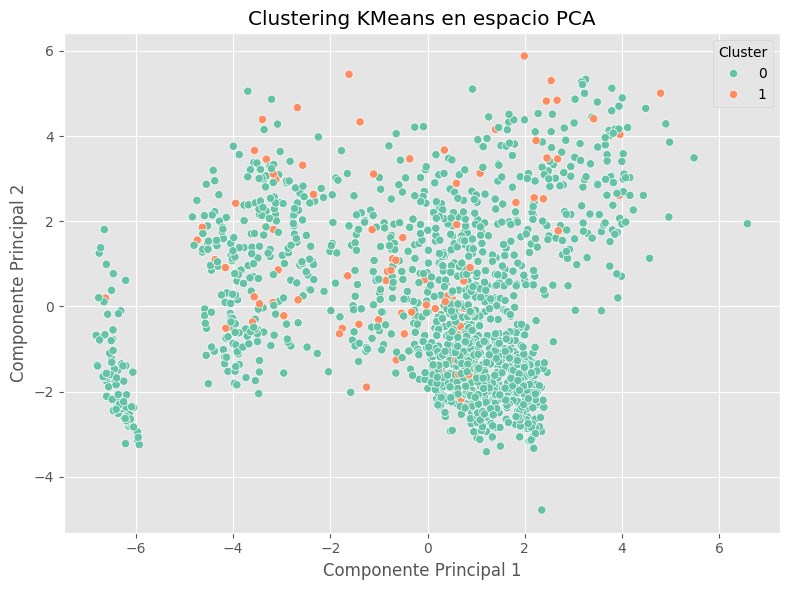

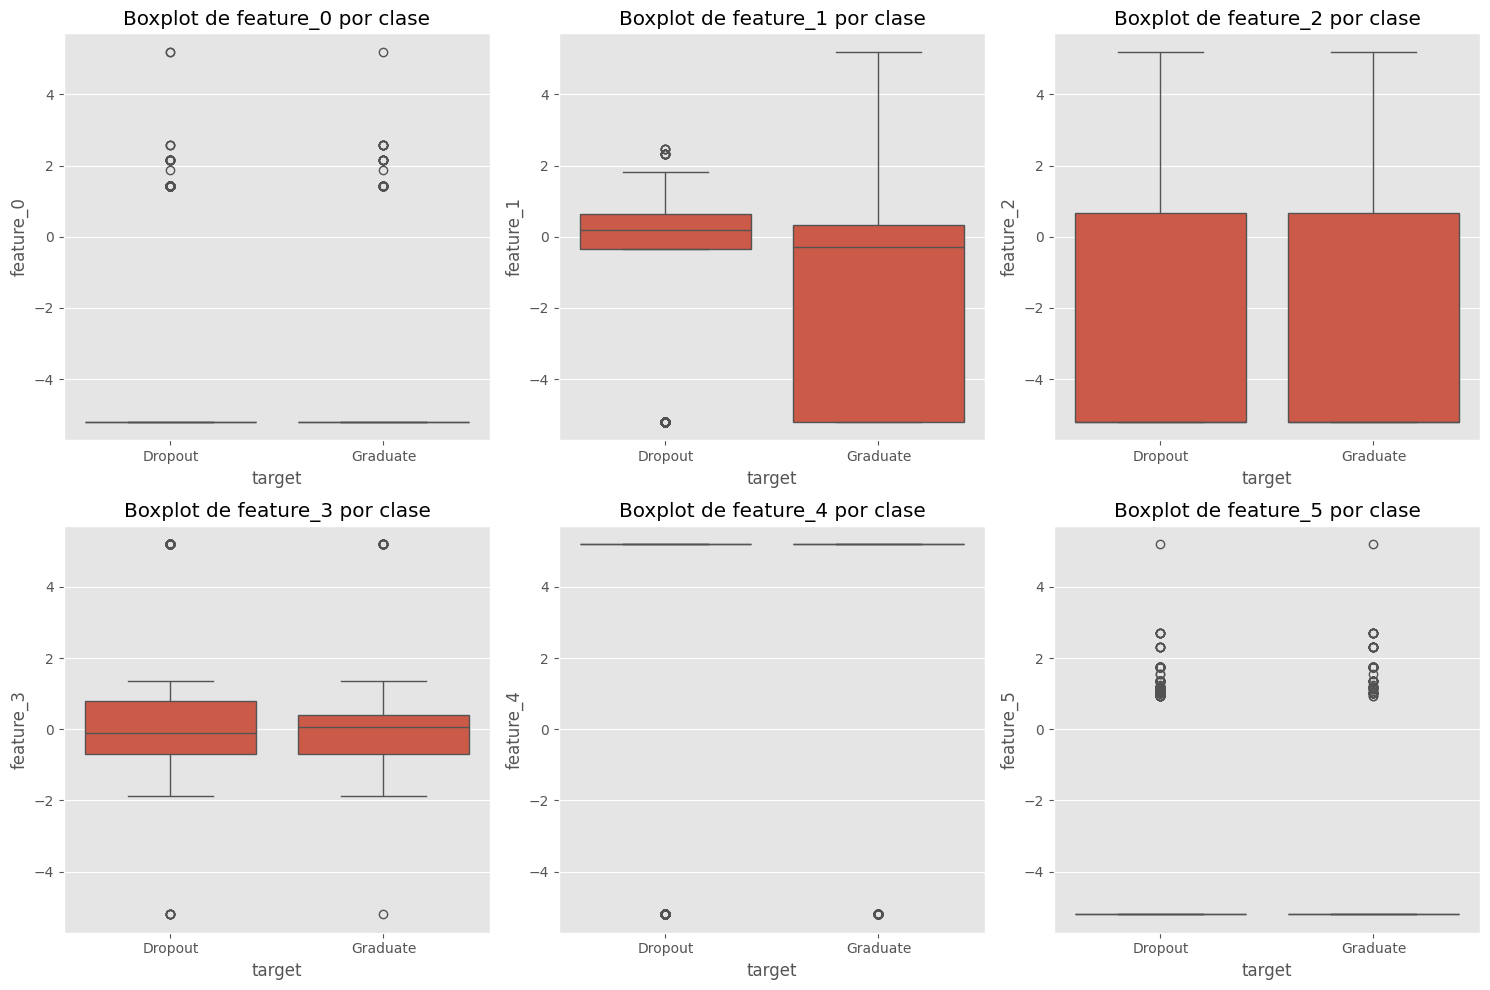

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar el archivo CSV
df = pd.read_csv("Data_fil_results/transformed_data.csv")

# Mezclar aleatoriamente las filas del DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separar características y variable objetivo
X = df.drop("target", axis=1)
y = df["target"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de los dos primeros componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1")
plt.title("Visualización PCA (2 componentes principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.tight_layout()
plt.show()

# Clustering con KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los resultados del clustering al DataFrame original
df["cluster"] = clusters

# Guardar el nuevo DataFrame con los clusters en un archivo CSV
df.to_csv("clustered_output.csv", index=False)
print("Archivo 'clustered_output.csv' guardado con éxito.")

# Visualización de clusters en el espacio PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2")
plt.title("Clustering KMeans en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers en algunas variables
selected_features = X.columns[:6]  # Puedes ajustar el número de variables
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y, y=df[feature])
    plt.title(f"Boxplot de {feature} por clase")
plt.tight_layout()
plt.show()

# BLOQUE 1 EDA Y PREPARACION DE DATOS

Vista general del dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -5.199338  -5.199338  -5.199338   0.403108   5.199338  -5.199338   
1  -5.199338   1.275817  -5.199338   0.403108   5.199338  -5.199338   
2  -5.199338  -5.199338  -5.199338   1.073988   5.199338  -5.199338   
3  -5.199338   0.037988   0.666564   0.076032   5.199338  -5.199338   
4  -5.199338   0.037988  -5.199338  -0.908458   5.199338  -5.199338   

   feature_6  feature_7  feature_8  feature_9  ...  feature_27  feature_28  \
0  -0.126937  -5.199338  -0.012660  -5.199338  ...   -5.199338    1.073988   
1  -1.008673  -5.199338  -5.199338  -5.199338  ...   -5.199338    1.073988   
2   1.304923  -5.199338  -0.012660   1.399657  ...   -5.199338    0.000000   
3   0.799083  -5.199338  -5.199338  -0.574460  ...   -5.199338    0.000000   
4  -1.168949  -5.199338   1.508944  -0.216904  ...   -5.199338    0.000000   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \


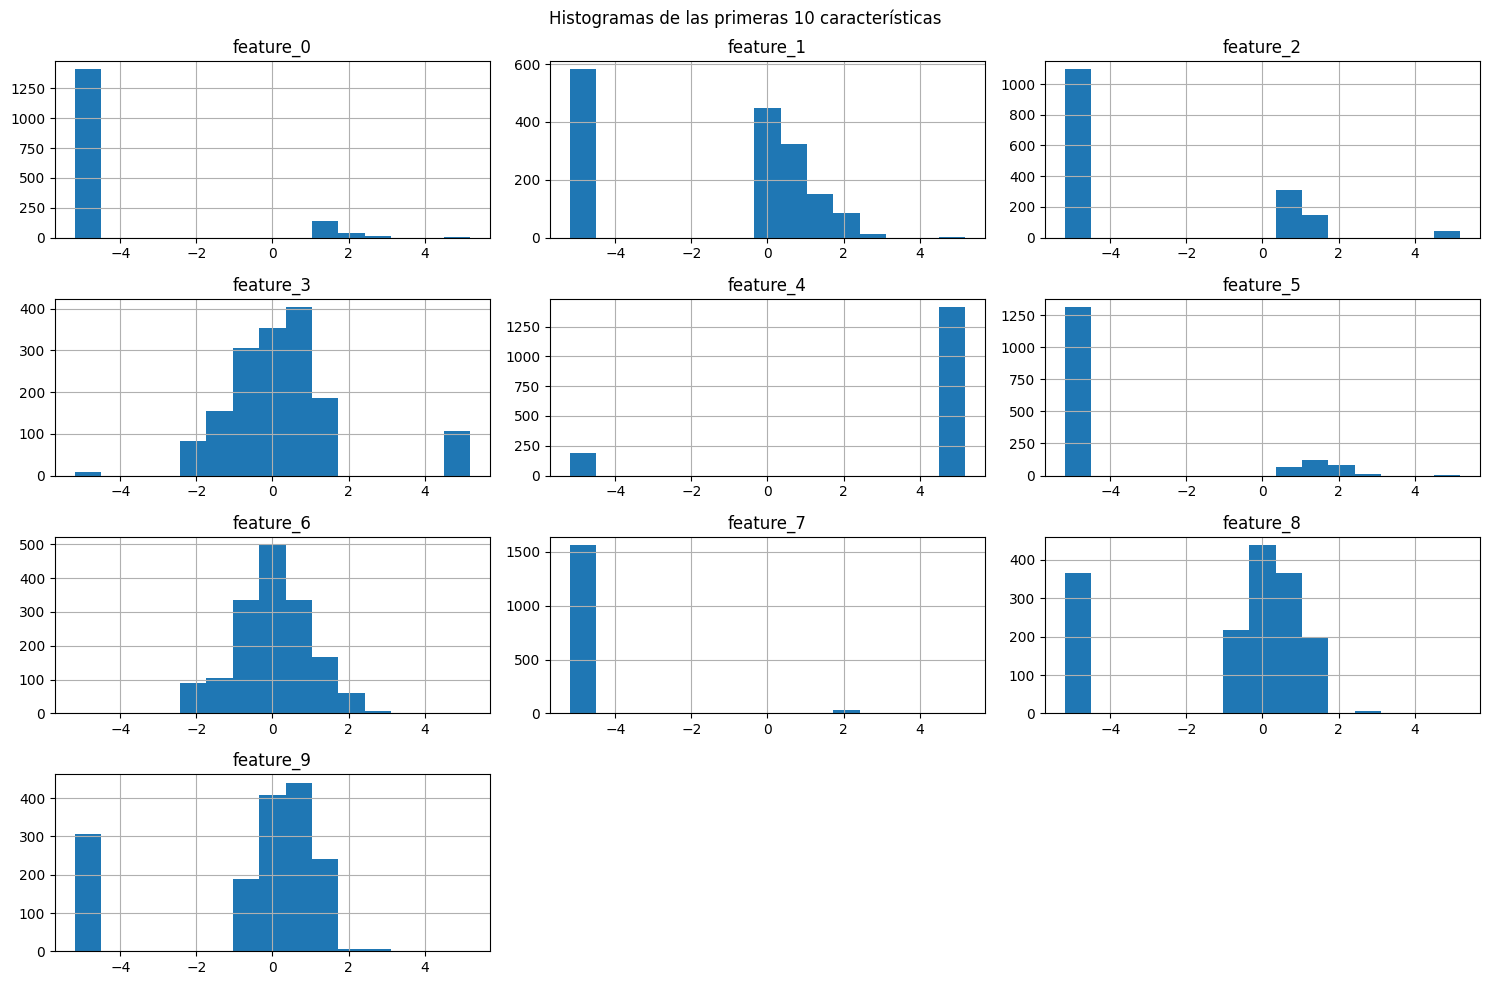


Distribución de la variable objetivo:
target
Graduate    800
Dropout     800
Name: count, dtype: int64


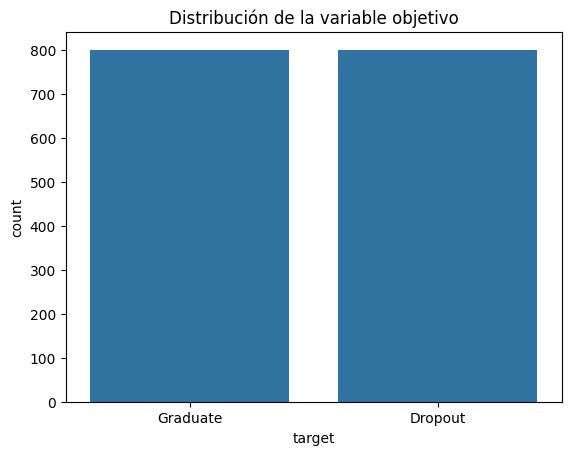

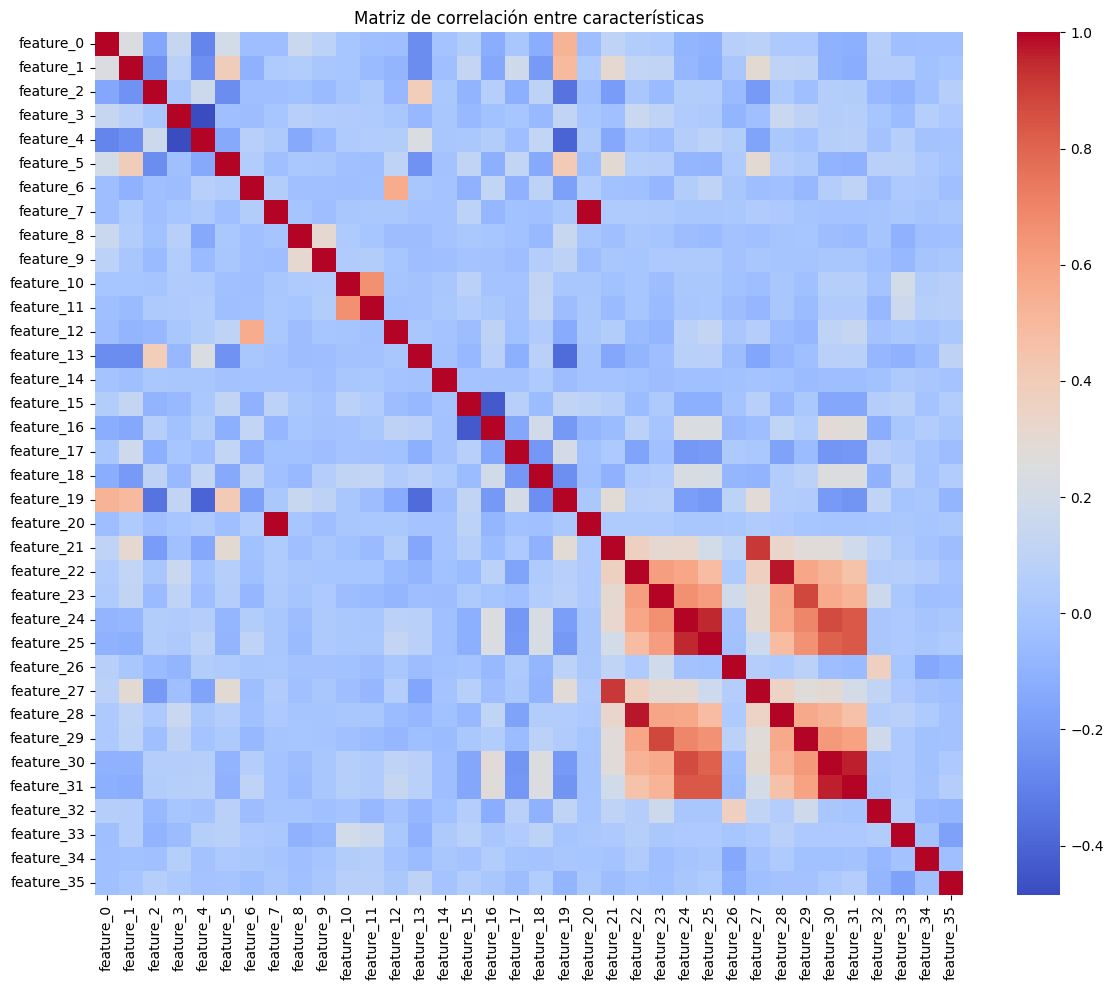

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("Data_fil_resultstransformed_data.csv")

# Vista general del dataset
print("Vista general del dataset:")
print(df.head())

# Tamaño del dataset
print("\nTamaño del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Histograma de las primeras 10 características
df.iloc[:, :10].hist(figsize=(15, 10), bins=15)
plt.suptitle("Histogramas de las primeras 10 características")
plt.tight_layout()
plt.show()

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(df["target"].value_counts())

sns.countplot(x="target", data=df)
plt.title("Distribución de la variable objetivo")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = df.drop("target", axis=1).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de correlación entre características")
plt.tight_layout()
plt.show()

# Bloque 2: Selección de Características con EDA Wrapper

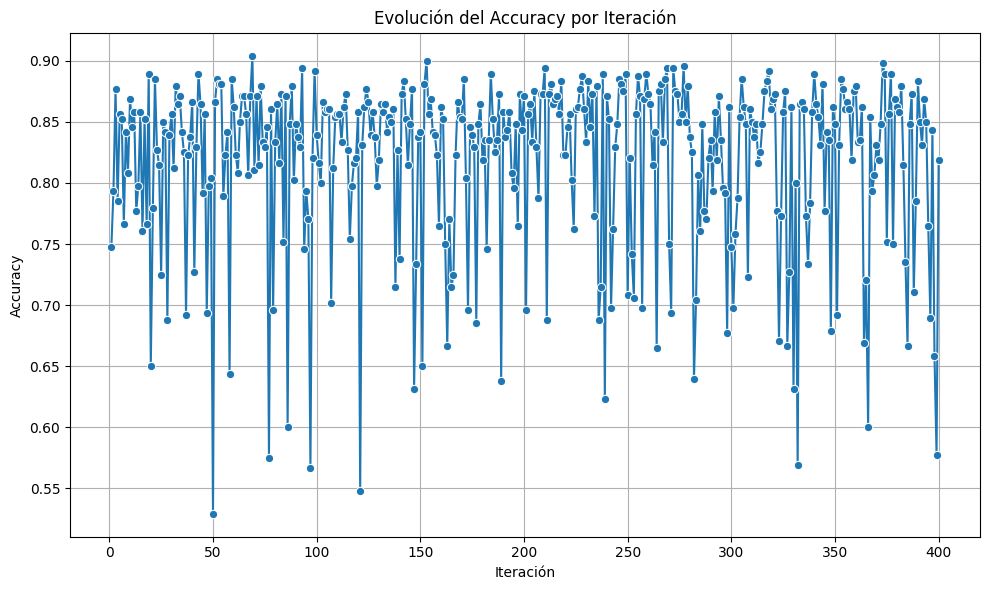

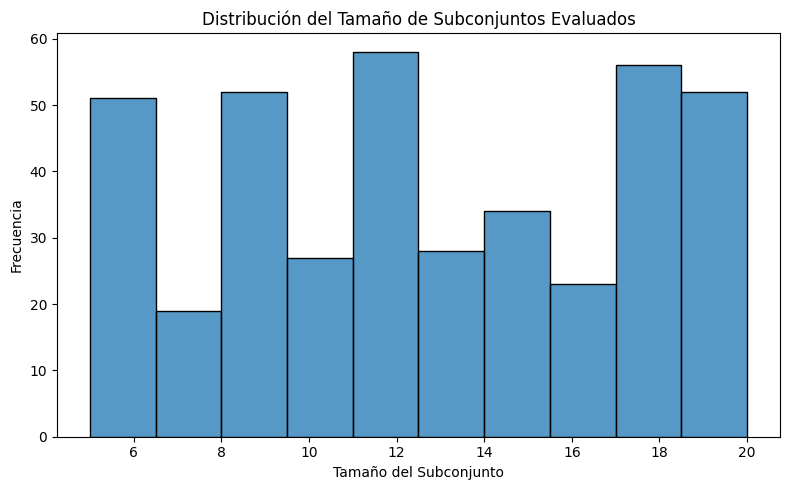

Top 5 subconjuntos con mayor accuracy:
     iteration  accuracy  subset_size  \
68          69  0.904167           19   
152        153  0.900000           20   
372        373  0.897917           17   
276        277  0.895833           17   
271        272  0.893750           12   

                                              features  
68   [feature_33, feature_29, feature_16, feature_3...  
152  [feature_2, feature_33, feature_23, feature_34...  
372  [feature_2, feature_23, feature_15, feature_16...  
276  [feature_14, feature_12, feature_28, feature_1...  
271  [feature_29, feature_33, feature_28, feature_3...  


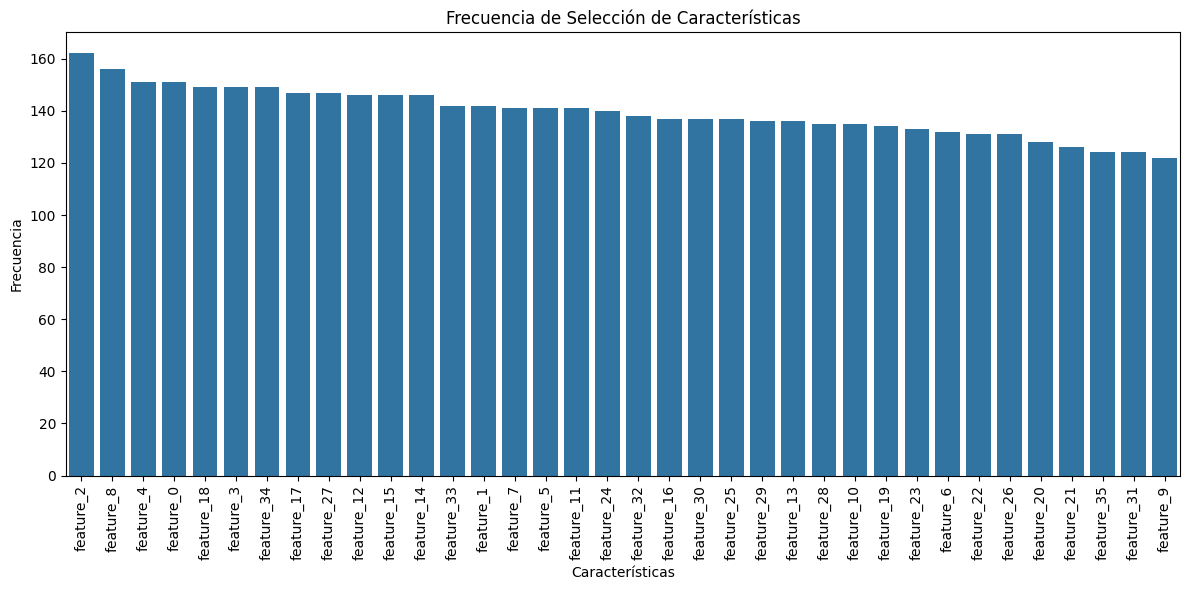


=== Mejor subconjunto de características ===
Accuracy: 0.8896
Características seleccionadas:
['feature_16', np.str_('feature_30'), np.str_('feature_18'), 'feature_14', np.str_('feature_3'), np.str_('feature_23')]

Tabla de características seleccionadas por el mejor individuo:
      feature
0  feature_16
1  feature_30
2  feature_18
3  feature_14
4   feature_3
5  feature_23


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Cargar el dataset
df = pd.read_csv("Data_fil_resultstransformed_data.csv")

# Separar características y variable objetivo
X = df.drop("target", axis=1)
y = df["target"]

# Configuración
num_iterations = 400
subset_size_range = (5, 20)

results = []
feature_counter = Counter()


# Encontrar el mejor subconjunto
best_result = results_df.loc[results_df['accuracy'].idxmax()]
best_accuracy = best_result['accuracy']
best_features = best_result['features']

# Búsqueda estocástica
for i in range(num_iterations):
    subset_size = random.randint(*subset_size_range)
    selected_features = random.sample(list(X.columns), subset_size)

    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.3, random_state=42
    )

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "iteration": i + 1,
        "accuracy": acc,
        "subset_size": subset_size,
        "features": selected_features
    })

    feature_counter.update(selected_features)

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# 1. Evolución del Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(x="iteration", y="accuracy", data=results_df, marker="o")
plt.title("Evolución del Accuracy por Iteración")
plt.xlabel("Iteración")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribución del Tamaño de Subconjuntos
plt.figure(figsize=(8, 5))
sns.histplot(results_df["subset_size"], bins=10)
plt.title("Distribución del Tamaño de Subconjuntos Evaluados")
plt.xlabel("Tamaño del Subconjunto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Tabla de los Mejores Subconjuntos
top_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("Top 5 subconjuntos con mayor accuracy:")
print(top_results[["iteration", "accuracy", "subset_size", "features"]])

# 4. Frecuencia de Selección de Características
freq_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_df.index, y="frequency", data=freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


# Al final del Bloque 2, después de calcular los resultados

# 5. Mostrar el mejor subconjunto de características
print("\n=== Mejor subconjunto de características ===")
print(f"Accuracy: {best_accuracy:.4f}")
print("Características seleccionadas:")
print(best_features)

# También como tabla
best_features_df = pd.DataFrame(best_features, columns=["feature"])
print("\nTabla de características seleccionadas por el mejor individuo:")
print(best_features_df)

# PRUEBAS BLOQUE 2

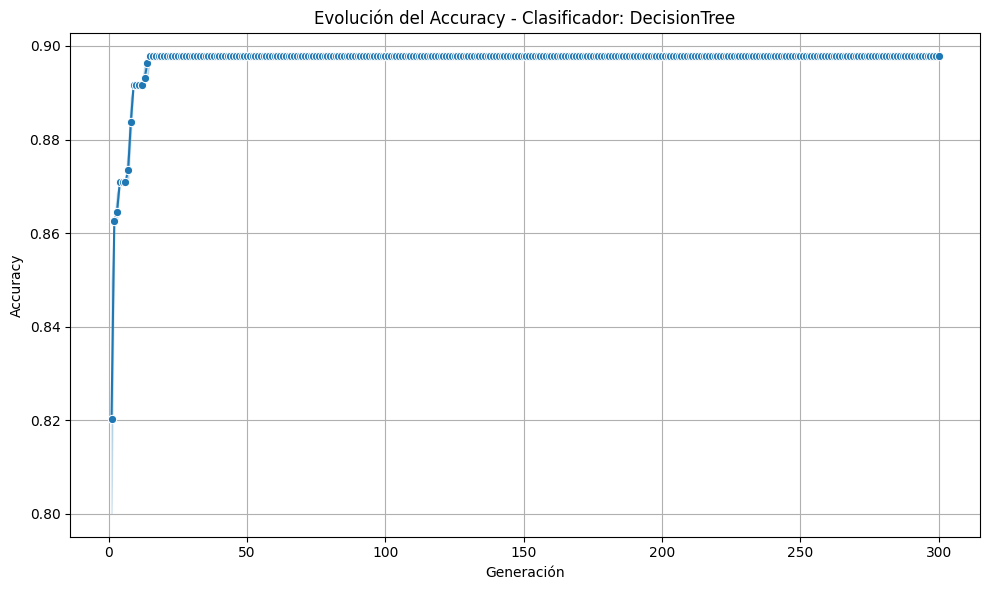

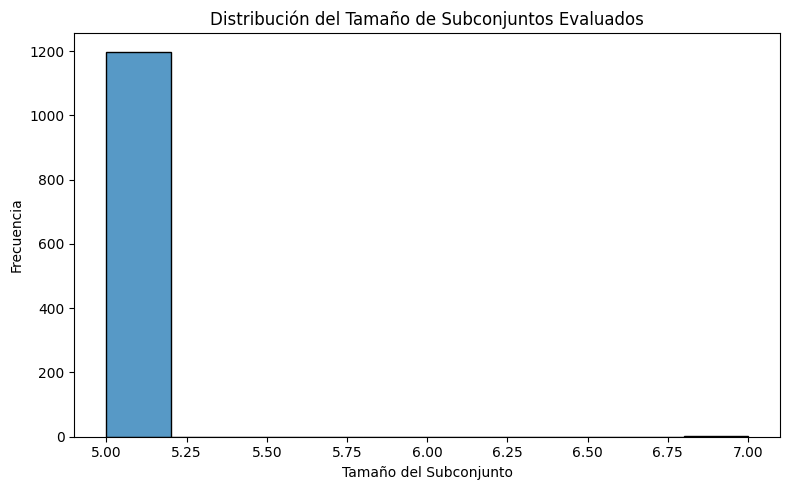

🔝 Top 5 subconjuntos con mayor accuracy:
      generation  accuracy  f1_score  subset_size  \
1183         296  0.897917  0.897883            5   
1182         296  0.897917  0.897883            5   
1181         296  0.897917  0.897883            5   
1180         296  0.897917  0.897883            5   
1179         295  0.897917  0.897883            5   

                                               features  
1183  [feature_30, feature_28, feature_16, feature_3...  
1182  [feature_30, feature_28, feature_16, feature_3...  
1181  [feature_30, feature_28, feature_16, feature_3...  
1180  [feature_30, feature_28, feature_16, feature_3...  
1179  [feature_30, feature_28, feature_16, feature_3...  


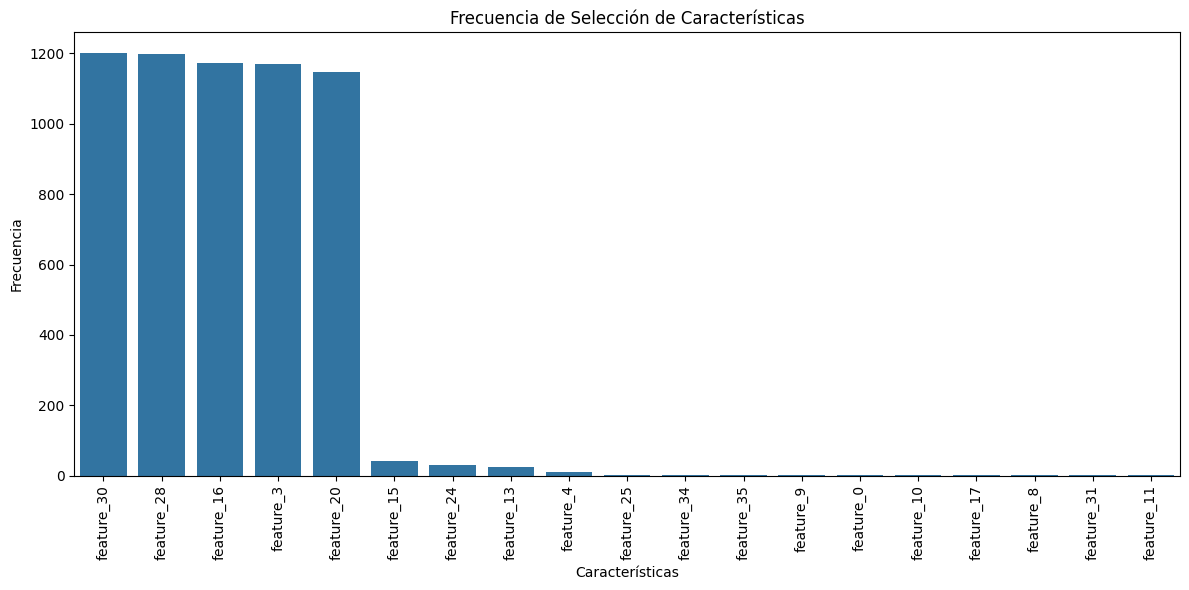


✅ Mejor subconjunto de características:
Accuracy: 0.8979
Características seleccionadas:
[np.str_('feature_30'), np.str_('feature_28'), 'feature_16', 'feature_3', 'feature_20']

📊 Tabla de resultados acumulados:
   experiment_id    classifier  max_accuracy  mean_accuracy  mean_f1_score  \
0              6  DecisionTree      0.897917       0.896925       0.896887   

   mean_subset_size  total_generations  
0             5.005               1200  


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# === CONFIGURACIÓN DEL EXPERIMENTO ===
config = {
    "experiment_id": 6,
    "num_generations": 50,
    "population_size": 20,
    "subset_size_range": (5, 10),
    "elite_fraction": 0.2,
    "mutation_rate": 0.3,
    "classifier_name": "SVM",  # Cambiar a: "SVM", "KNN", etc.
    "random_state": 42
}

# === CARGA DE DATOS ===
data_file = "Data_fil_resultstransformed_data.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"El archivo {data_file} no se encuentra en el directorio actual.")

df = pd.read_csv(data_file)
X = df.drop("target", axis=1)
y = df["target"]
feature_names = list(X.columns)

# === FUNCIÓN PARA OBTENER CLASIFICADOR ===
def get_classifier(name, seed=42):
    if name == "RandomForest":
        return RandomForestClassifier(n_estimators=100, random_state=seed)
    elif name == "SVM":
        return SVC(kernel='rbf', probability=True, random_state=seed)
    elif name == "LogisticRegression":
        return LogisticRegression(max_iter=1000, random_state=seed)
    elif name == "KNN":
        return KNeighborsClassifier(n_neighbors=7)
    elif name == "DecisionTree":
        return DecisionTreeClassifier(random_state=seed)
    elif name == "ExtraTrees":
        return ExtraTreesClassifier(n_estimators=100, random_state=seed)
    elif name == "NaiveBayes":
        return GaussianNB()
    elif name == "MLP":
        return MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed)
    elif name == "QDA":
        return QuadraticDiscriminantAnalysis()
    else:
        raise ValueError("Clasificador no reconocido")

# === FUNCIONES AUXILIARES ===
def evaluate_subset(features, classifier):
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], y, test_size=0.3, random_state=config["random_state"]
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1

def generate_population(prob_dist, size):
    population = []
    for _ in range(size):
        subset_size = random.randint(*config["subset_size_range"])
        selected = np.random.choice(feature_names, size=subset_size, replace=False, p=prob_dist)
        population.append(list(selected))
    return population

def mutate(subset):
    mutated = subset.copy()
    if random.random() < config["mutation_rate"]:
        idx_to_replace = random.randint(0, len(mutated)-1)
        new_feature = random.choice([f for f in feature_names if f not in mutated])
        mutated[idx_to_replace] = new_feature
    return mutated

# === INICIALIZACIÓN ===
initial_prob = np.ones(len(feature_names)) / len(feature_names)
population = generate_population(initial_prob, config["population_size"])
results = []

# === EVOLUCIÓN POR GENERACIONES ===
for gen in range(config["num_generations"]):
    gen_results = []
    for subset in population:
        acc_nb, _ = evaluate_subset(subset, GaussianNB())
        if acc_nb < 0.5:
            continue  # Filtro rápido

        clf = get_classifier(config["classifier_name"], config["random_state"])
        acc_rf, f1_rf = evaluate_subset(subset, clf)
        gen_results.append({
            "experiment_id": config["experiment_id"],
            "generation": gen + 1,
            "features": subset,
            "accuracy": acc_rf,
            "f1_score": f1_rf,
            "subset_size": len(subset),
            "classifier": config["classifier_name"]
        })

    # Selección elitista
    gen_results.sort(key=lambda x: x["accuracy"], reverse=True)
    elite_count = max(1, int(config["elite_fraction"] * len(gen_results)))
    elites = gen_results[:elite_count]
    results.extend(elites)

    # Modelar distribución de características
    feature_counter = Counter()
    for elite in elites:
        feature_counter.update(elite["features"])
    total = sum(feature_counter.values())
    prob_dist = np.array([feature_counter.get(f, 0) / total for f in feature_names])

    # Generar nueva población con mutación
    new_population = []
    while len(new_population) < config["population_size"]:
        base_subset = random.choice(elites)["features"]
        mutated_subset = mutate(base_subset)
        new_population.append(mutated_subset)
    population = new_population

# === RESULTADOS ===
results_df = pd.DataFrame(results)

# 1. Evolución del Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(x="generation", y="accuracy", data=results_df, marker="o")
plt.title(f"Evolución del Accuracy - Clasificador: {config['classifier_name']}")
plt.xlabel("Generación")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribución del Tamaño de Subconjuntos
plt.figure(figsize=(8, 5))
sns.histplot(results_df["subset_size"], bins=10)
plt.title("Distribución del Tamaño de Subconjuntos Evaluados")
plt.xlabel("Tamaño del Subconjunto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Tabla de los Mejores Subconjuntos
top_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("🔝 Top 5 subconjuntos con mayor accuracy:")
print(top_results[["generation", "accuracy", "f1_score", "subset_size", "features"]])

# 4. Frecuencia de Selección de Características
feature_counter = Counter()
for row in results_df["features"]:
    feature_counter.update(row)

freq_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_df.index, y="frequency", data=freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 5. Mejor subconjunto
best_result = results_df.loc[results_df['accuracy'].idxmax()]
print("\n✅ Mejor subconjunto de características:")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print("Características seleccionadas:")
print(best_result['features'])

# 6. Tabla de resultados acumulados
summary = results_df.groupby("experiment_id").agg({
    "classifier": "first",
    "accuracy": ["max", "mean"],
    "f1_score": "mean",
    "subset_size": "mean",
    "generation": "count"
}).reset_index()

summary.columns = [
    "experiment_id", "classifier", "max_accuracy", "mean_accuracy",
    "mean_f1_score", "mean_subset_size", "total_generations"
]

print("\n📊 Tabla de resultados acumulados:")
print(summary)

# PRUEBA 3


💾 Resultados guardados en: results_log.csv


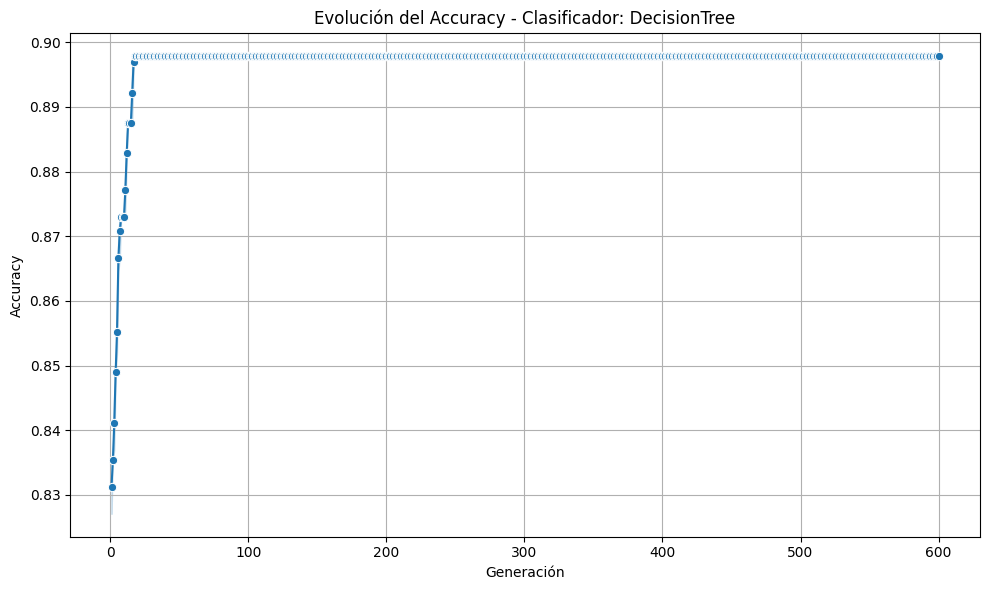

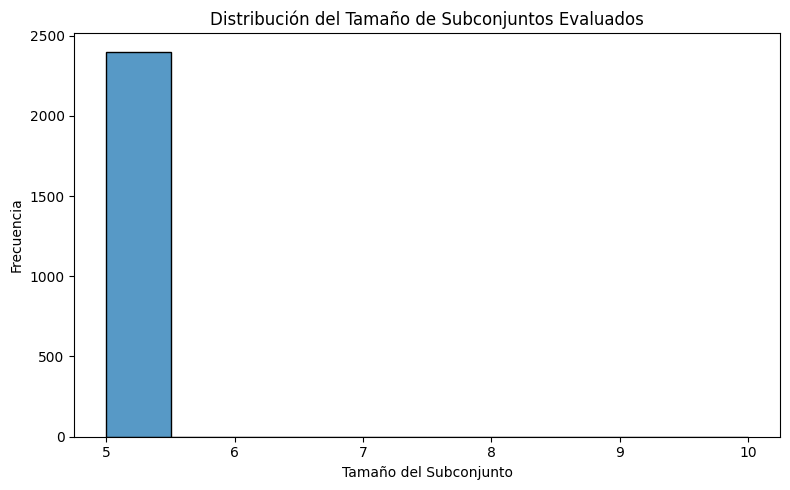

🔝 Top 5 subconjuntos con mayor accuracy:
      generation  accuracy  f1_score  subset_size  \
2383         596  0.897917  0.897883            5   
2382         596  0.897917  0.897883            5   
2381         596  0.897917  0.897883            5   
2380         596  0.897917  0.897883            5   
2379         595  0.897917  0.897883            5   

                                               features  
2383  [feature_16, feature_28, feature_30, feature_3...  
2382  [feature_16, feature_28, feature_30, feature_3...  
2381  [feature_16, feature_28, feature_30, feature_3...  
2380  [feature_16, feature_28, feature_30, feature_3...  
2379  [feature_16, feature_28, feature_30, feature_3...  


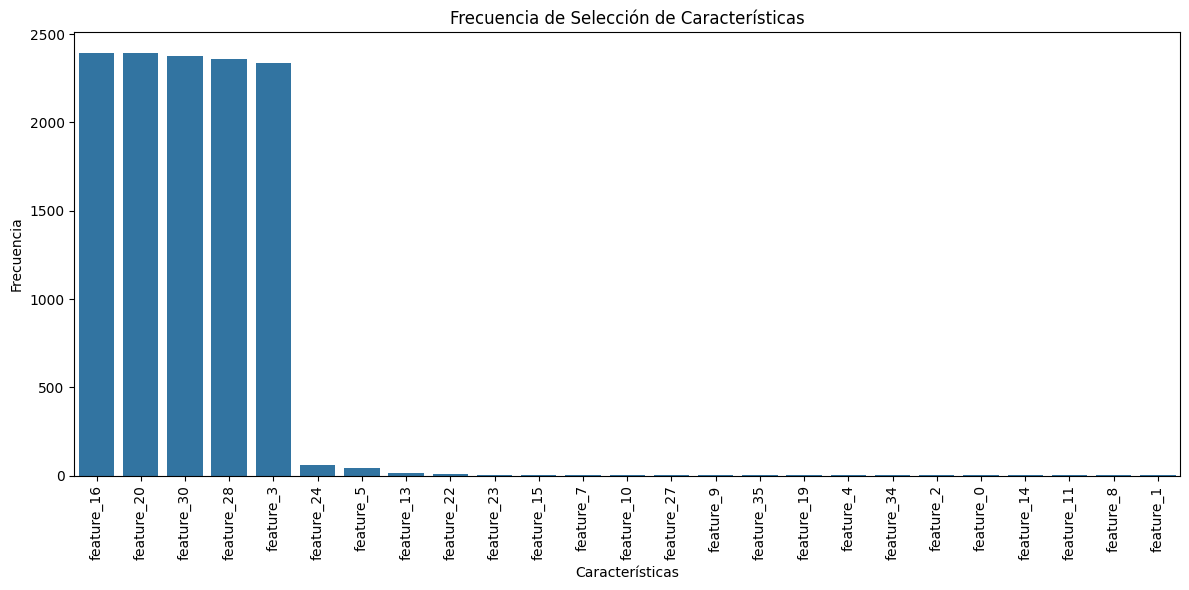


✅ Mejor subconjunto de características:
Accuracy: 0.8979
Características seleccionadas:
['feature_16', 'feature_28', 'feature_30', 'feature_3', np.str_('feature_20')]

📊 Tabla de resultados acumulados:
   experiment_id    classifier  max_accuracy  mean_accuracy  mean_f1_score  \
0              2  DecisionTree      0.897917       0.897109       0.897072   

   mean_subset_size  total_generations  
0          5.004583               2400  


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# === CONFIGURACIÓN GENERAL ===
results_log_file = "results_log.csv"

# Auto-incrementar experiment_id
if os.path.exists(results_log_file):
    existing_df = pd.read_csv(results_log_file)
    last_id = existing_df["experiment_id"].max()
    experiment_id = last_id + 1
else:
    experiment_id = 1

config = {
    "experiment_id": experiment_id,
    "num_generations": 600,
    "population_size": 20,
    "subset_size_range": (5, 10),
    "elite_fraction": 0.2,
    "mutation_rate": 0.3,
    "classifier_name": "DecisionTree",  # Cambiar a: "SVM", "KNN", etc.
    "random_state": 42
}

# === CARGA DE DATOS ===
data_file = "Data_fil_resultstransformed_data.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"El archivo {data_file} no se encuentra en el directorio actual.")

df = pd.read_csv(data_file)
X = df.drop("target", axis=1)
y = df["target"]
feature_names = list(X.columns)

# === FUNCIÓN PARA OBTENER CLASIFICADOR ===
def get_classifier(name, seed=42):
    if name == "RandomForest":
        return RandomForestClassifier(n_estimators=100, random_state=seed)
    elif name == "SVM":
        return SVC(kernel='rbf', probability=True, random_state=seed)
    elif name == "LogisticRegression":
        return LogisticRegression(max_iter=1000, random_state=seed)
    elif name == "KNN":
        return KNeighborsClassifier(n_neighbors=7)
    elif name == "DecisionTree":
        return DecisionTreeClassifier(random_state=seed)
    elif name == "ExtraTrees":
        return ExtraTreesClassifier(n_estimators=100, random_state=seed)
    elif name == "NaiveBayes":
        return GaussianNB()
    elif name == "MLP":
        return MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed)
    elif name == "QDA":
        return QuadraticDiscriminantAnalysis()
    else:
        raise ValueError("Clasificador no reconocido")

# === FUNCIONES AUXILIARES ===
def evaluate_subset(features, classifier):
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], y, test_size=0.3, random_state=config["random_state"]
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1

def generate_population(prob_dist, size):
    population = []
    for _ in range(size):
        subset_size = random.randint(*config["subset_size_range"])
        selected = np.random.choice(feature_names, size=subset_size, replace=False, p=prob_dist)
        population.append(list(selected))
    return population

def mutate(subset):
    mutated = subset.copy()
    if random.random() < config["mutation_rate"]:
        idx_to_replace = random.randint(0, len(mutated)-1)
        new_feature = random.choice([f for f in feature_names if f not in mutated])
        mutated[idx_to_replace] = new_feature
    return mutated

# === INICIALIZACIÓN ===
initial_prob = np.ones(len(feature_names)) / len(feature_names)
population = generate_population(initial_prob, config["population_size"])
results = []

# === EVOLUCIÓN POR GENERACIONES (con GRAPeR) ===
for gen in range(config["num_generations"]):
    gen_results = []
    for subset in population:
        acc_nb, _ = evaluate_subset(subset, GaussianNB())
        if acc_nb < 0.5:
            continue  # Filtro rápido con Naive Bayes

        clf = get_classifier(config["classifier_name"], config["random_state"])
        acc_rf, f1_rf = evaluate_subset(subset, clf)
        gen_results.append({
            "experiment_id": config["experiment_id"],
            "generation": gen + 1,
            "features": subset,
            "accuracy": acc_rf,
            "f1_score": f1_rf,
            "subset_size": len(subset),
            "classifier": config["classifier_name"]
        })

    if not gen_results:
        continue

    # === GRAPeR: distribución probabilística por ranking ===
    gen_results.sort(key=lambda x: x["accuracy"], reverse=True)
    rank_weights = np.linspace(1.0, 0.1, len(gen_results))  # Mayor peso a mejor ranking

    feature_counter = Counter()
    for idx, res in enumerate(gen_results):
        weight = rank_weights[idx]
        feature_counter.update({f: weight for f in res["features"]})

    total_weight = sum(feature_counter.values())
    prob_dist = np.array([feature_counter.get(f, 0) / total_weight for f in feature_names])

    # === Elitismo: guardar top resultados de esta generación ===
    elite_count = max(1, int(config["elite_fraction"] * len(gen_results)))
    elites = gen_results[:elite_count]
    results.extend(elites)

    # === Generar nueva población con mutación ===
    new_population = []
    while len(new_population) < config["population_size"]:
        base_subset = random.choice(elites)["features"]
        mutated_subset = mutate(base_subset)
        new_population.append(mutated_subset)
    population = new_population

# === RESULTADOS ===
results_df = pd.DataFrame(results)

# === Guardar en archivo acumulativo ===
if os.path.exists(results_log_file):
    combined_df = pd.concat([existing_df, results_df], ignore_index=True)
else:
    combined_df = results_df

combined_df.to_csv(results_log_file, index=False)
print(f"\n💾 Resultados guardados en: {results_log_file}")

# === Visualizaciones ===

# 1. Evolución del Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(x="generation", y="accuracy", data=results_df, marker="o")
plt.title(f"Evolución del Accuracy - Clasificador: {config['classifier_name']}")
plt.xlabel("Generación")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribución del Tamaño de Subconjuntos
plt.figure(figsize=(8, 5))
sns.histplot(results_df["subset_size"], bins=10)
plt.title("Distribución del Tamaño de Subconjuntos Evaluados")
plt.xlabel("Tamaño del Subconjunto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Top 5 subconjuntos
top_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("🔝 Top 5 subconjuntos con mayor accuracy:")
print(top_results[["generation", "accuracy", "f1_score", "subset_size", "features"]])

# 4. Frecuencia de Selección de Características
feature_counter = Counter()
for row in results_df["features"]:
    feature_counter.update(row)

freq_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_df.index, y="frequency", data=freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 5. Mejor subconjunto
best_result = results_df.loc[results_df['accuracy'].idxmax()]
print("\n✅ Mejor subconjunto de características:")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print("Características seleccionadas:")
print(best_result['features'])

# 6. Tabla resumen acumulada
summary = results_df.groupby("experiment_id").agg({
    "classifier": "first",
    "accuracy": ["max", "mean"],
    "f1_score": "mean",
    "subset_size": "mean",
    "generation": "count"
}).reset_index()

summary.columns = [
    "experiment_id", "classifier", "max_accuracy", "mean_accuracy",
    "mean_f1_score", "mean_subset_size", "total_generations"
]

print("\n📊 Tabla de resultados acumulados:")
print(summary)

Gen 1/50: Mejor Accuracy = 0.8667
Gen 2/50: Mejor Accuracy = 0.8667
Gen 3/50: Mejor Accuracy = 0.8667
Gen 4/50: Mejor Accuracy = 0.8667
Gen 5/50: Mejor Accuracy = 0.8688
Gen 6/50: Mejor Accuracy = 0.8750
Gen 7/50: Mejor Accuracy = 0.8750
Gen 8/50: Mejor Accuracy = 0.8750
Gen 9/50: Mejor Accuracy = 0.8750
Gen 10/50: Mejor Accuracy = 0.8750
Gen 11/50: Mejor Accuracy = 0.8750
Gen 12/50: Mejor Accuracy = 0.8750
Gen 13/50: Mejor Accuracy = 0.8750
Gen 14/50: Mejor Accuracy = 0.8750
Gen 15/50: Mejor Accuracy = 0.8750
Gen 16/50: Mejor Accuracy = 0.8750
Gen 17/50: Mejor Accuracy = 0.8750
Gen 18/50: Mejor Accuracy = 0.8750
Gen 19/50: Mejor Accuracy = 0.8750
Gen 20/50: Mejor Accuracy = 0.8750
Gen 21/50: Mejor Accuracy = 0.8750
Gen 22/50: Mejor Accuracy = 0.8750
Gen 23/50: Mejor Accuracy = 0.8750
Gen 24/50: Mejor Accuracy = 0.8750
Gen 25/50: Mejor Accuracy = 0.8750
Gen 26/50: Mejor Accuracy = 0.8750
Gen 27/50: Mejor Accuracy = 0.8812
Gen 28/50: Mejor Accuracy = 0.8812
Gen 29/50: Mejor Accuracy = 0

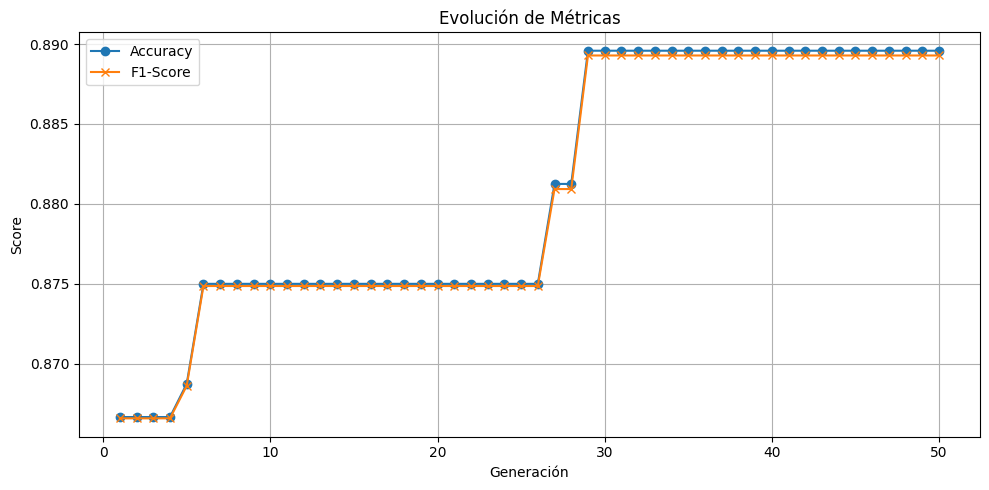


✅ Matriz de Confusión del Mejor Subconjunto:
[[200  38]
 [ 15 227]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

     Dropout       0.93      0.84      0.88       238
    Graduate       0.86      0.94      0.90       242

    accuracy                           0.89       480
   macro avg       0.89      0.89      0.89       480
weighted avg       0.89      0.89      0.89       480



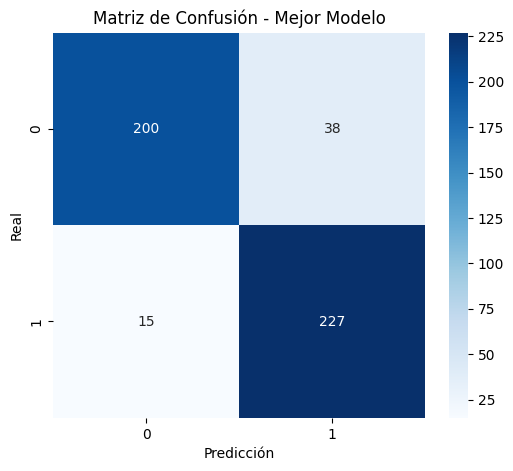


🔝 Top 5 subconjuntos con mayor accuracy:
     generation  accuracy  f1_score  subset_size
191          48  0.889583  0.889285            6
190          48  0.889583  0.889285            6
189          48  0.889583  0.889285            6
188          48  0.889583  0.889285            6
187          47  0.889583  0.889285            6

Características seleccionadas en los 5 mejores subconjuntos ordenadas por frecuencia:
feature_16: 5 veces
feature_30: 5 veces
feature_18: 5 veces
feature_14: 5 veces
feature_3: 5 veces
feature_23: 5 veces


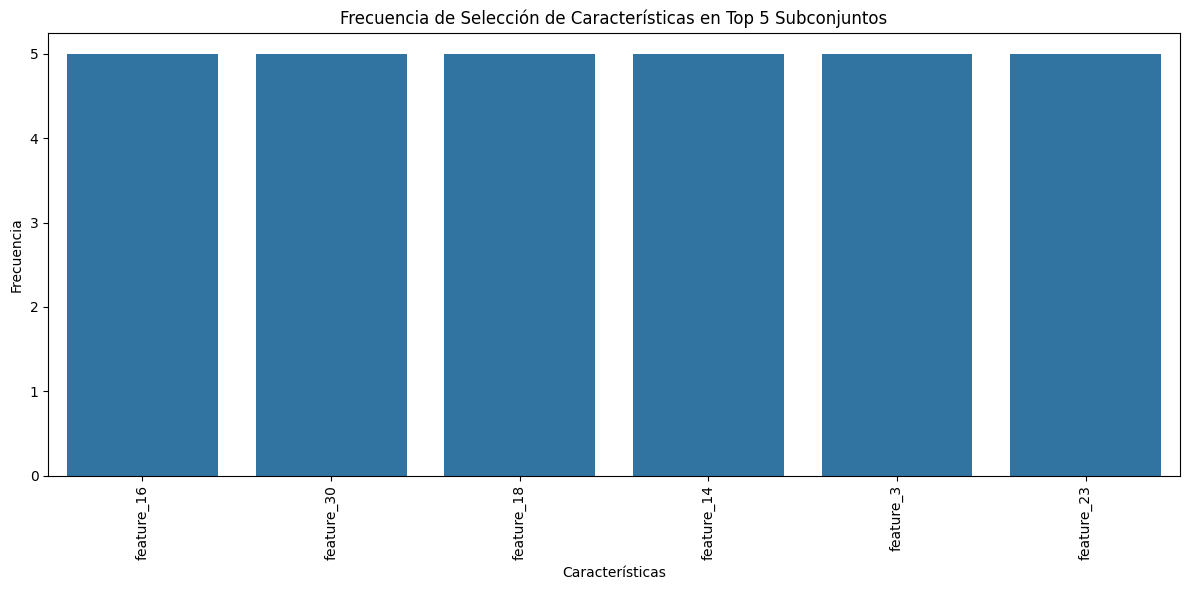

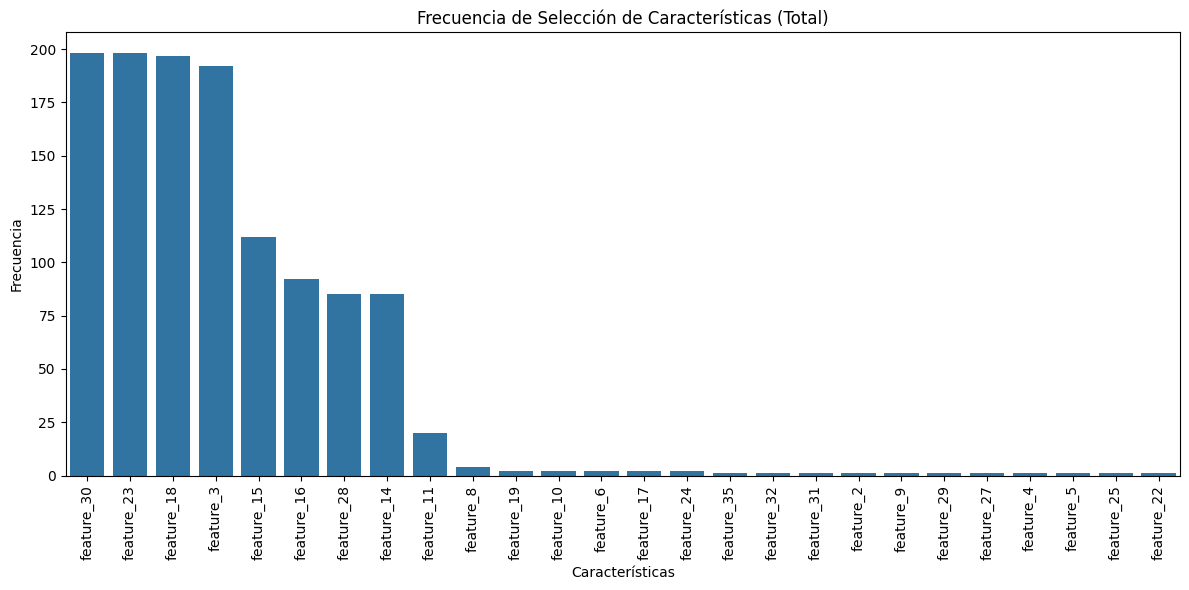


✅ Mejor subconjunto de características:
Accuracy: 0.8896
Características seleccionadas (ordenadas por frecuencia global):
[np.str_('feature_30'), np.str_('feature_23'), np.str_('feature_18'), np.str_('feature_3'), 'feature_16', 'feature_14']

📊 Tabla de resultados acumulados:
   experiment_id classifier  max_accuracy  mean_accuracy  mean_f1_score  \
0              1        SVM      0.889583       0.879927       0.879707   

   mean_subset_size  total_generations  
0              6.02                200  


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# === CONFIGURACIÓN DEL EXPERIMENTO ===
config = {
    "experiment_id": 1,
    "num_generations": 50,
    "population_size": 20,
    "subset_size_range": (5, 10),
    "elite_fraction": 0.2,
    "mutation_rate": 0.3,
    "classifier_name": "SVM",
    "random_state": 42
}

# === CARGA DE DATOS ===
data_file = "Data_fil_resultstransformed_data.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"El archivo {data_file} no se encuentra en el directorio actual.")

df = pd.read_csv(data_file)
X = df.drop("target", axis=1)
y = df["target"]
feature_names = list(X.columns)

# === CARGA DE HISTORIAL DE RESULTADOS ===
history_file = "graper_results_history.csv"
if os.path.exists(history_file):
    history_df = pd.read_csv(history_file)
    last_experiment_id = history_df["experiment_id"].max() + 1
else:
    history_df = pd.DataFrame()
    last_experiment_id = config["experiment_id"]
config["experiment_id"] = last_experiment_id

# === CLASIFICADOR ===
def get_classifier(name, seed=42):
    if name == "RandomForest":
        return RandomForestClassifier(n_estimators=100, random_state=seed)
    elif name == "SVM":
        return SVC(kernel='rbf', probability=True, random_state=seed)
    elif name == "LogisticRegression":
        return LogisticRegression(max_iter=1000, random_state=seed)
    elif name == "KNN":
        return KNeighborsClassifier(n_neighbors=7)
    elif name == "DecisionTree":
        return DecisionTreeClassifier(random_state=seed)
    elif name == "ExtraTrees":
        return ExtraTreesClassifier(n_estimators=100, random_state=seed)
    elif name == "NaiveBayes":
        return GaussianNB()
    elif name == "MLP":
        return MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed)
    elif name == "QDA":
        return QuadraticDiscriminantAnalysis()
    else:
        raise ValueError("Clasificador no reconocido")

# === EVALUACIÓN ===
def evaluate_subset(features, classifier):
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], y, test_size=0.3, random_state=config["random_state"]
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1, y_test, y_pred

# === POBLACIÓN INICIAL ===
def generate_population(prob_dist, size):
    population = []
    for _ in range(size):
        subset_size = random.randint(*config["subset_size_range"])
        selected = np.random.choice(feature_names, size=subset_size, replace=False, p=prob_dist)
        population.append(list(selected))
    return population

def mutate(subset):
    mutated = subset.copy()
    if random.random() < config["mutation_rate"]:
        idx_to_replace = random.randint(0, len(mutated)-1)
        # Selecciona un nuevo feature no presente en subset
        new_feature = random.choice([f for f in feature_names if f not in mutated])
        mutated[idx_to_replace] = new_feature
    return mutated

initial_prob = np.ones(len(feature_names)) / len(feature_names)
population = generate_population(initial_prob, config["population_size"])
results = []
accuracy_history = []
f1_history = []
best_y_test, best_y_pred = None, None

# === EVOLUCIÓN ===
for gen in range(config["num_generations"]):
    gen_results = []
    for subset in population:
        acc_nb, _, _, _ = evaluate_subset(subset, GaussianNB())
        if acc_nb < 0.5:
            continue

        clf = get_classifier(config["classifier_name"], config["random_state"])
        acc_rf, f1_rf, y_test, y_pred = evaluate_subset(subset, clf)

        gen_results.append({
            "experiment_id": config["experiment_id"],
            "generation": gen + 1,
            "features": subset,
            "accuracy": acc_rf,
            "f1_score": f1_rf,
            "subset_size": len(subset),
            "classifier": config["classifier_name"]
        })

    if not gen_results:
        continue

    gen_results.sort(key=lambda x: x["accuracy"], reverse=True)
    elite_count = max(1, int(config["elite_fraction"] * len(gen_results)))
    elites = gen_results[:elite_count]
    results.extend(elites)

    accuracy_history.append(elites[0]["accuracy"])
    f1_history.append(elites[0]["f1_score"])

    if elites[0]["accuracy"] >= max(accuracy_history):
        best_y_test, best_y_pred = y_test, y_pred

    print(f"Gen {gen+1}/{config['num_generations']}: Mejor Accuracy = {elites[0]['accuracy']:.4f}")

    # Actualizar distribución de probabilidad según frecuencia de features en elites
    feature_counter = Counter()
    for elite in elites:
        feature_counter.update(elite["features"])
    total = sum(feature_counter.values())
    prob_dist = np.array([feature_counter.get(f, 0) / total for f in feature_names])

    new_population = []
    while len(new_population) < config["population_size"]:
        base_subset = random.choice(elites)["features"]
        mutated_subset = mutate(base_subset)
        new_population.append(mutated_subset)
    population = new_population

# === RESULTADOS ===
results_df = pd.DataFrame(results)

# Graficar evolución accuracy y f1
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_history)+1), accuracy_history, label="Accuracy", marker="o")
plt.plot(range(1, len(f1_history)+1), f1_history, label="F1-Score", marker="x")
plt.xlabel("Generación")
plt.ylabel("Score")
plt.title("Evolución de Métricas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir matriz de confusión y reporte clasificación del mejor resultado
if best_y_test is not None and best_y_pred is not None:
    print("\n✅ Matriz de Confusión del Mejor Subconjunto:")
    cm = confusion_matrix(best_y_test, best_y_pred)
    print(cm)
    print("\n📋 Reporte de Clasificación:")
    print(classification_report(best_y_test, best_y_pred))

    # Mostrar matriz de confusión con seaborn para mejor visualización
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión - Mejor Modelo")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Mostrar top 5 mejores subconjuntos ordenados por accuracy
top_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("\n🔝 Top 5 subconjuntos con mayor accuracy:")
print(top_results[["generation", "accuracy", "f1_score", "subset_size"]])

# Contar frecuencia de características en top 5 subconjuntos y ordenarlas por frecuencia descendente
top_features_counter = Counter()
for features_list in top_results["features"]:
    top_features_counter.update(features_list)

print("\nCaracterísticas seleccionadas en los 5 mejores subconjuntos ordenadas por frecuencia:")
for feat, freq in top_features_counter.most_common():
    print(f"{feat}: {freq} veces")

# Mostrar gráfico de frecuencia para características de los top 5
top_freq_df = pd.DataFrame.from_dict(top_features_counter, orient='index', columns=["frequency"])
top_freq_df = top_freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_freq_df.index, y="frequency", data=top_freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características en Top 5 Subconjuntos")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Frecuencia total de características en todos los resultados
feature_counter = Counter()
for row in results_df["features"]:
    feature_counter.update(row)

freq_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_df.index, y="frequency", data=freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características (Total)")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Mejor resultado
best_result = results_df.loc[results_df['accuracy'].idxmax()]
print("\n✅ Mejor subconjunto de características:")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print("Características seleccionadas (ordenadas por frecuencia global):")

# Ordenar características del mejor resultado según frecuencia global descendente
best_feats = best_result['features']
best_feats_sorted = sorted(best_feats, key=lambda f: feature_counter.get(f, 0), reverse=True)
print(best_feats_sorted)

summary = results_df.groupby("experiment_id").agg({
    "classifier": "first",
    "accuracy": ["max", "mean"],
    "f1_score": "mean",
    "subset_size": "mean",
    "generation": "count"
}).reset_index()

summary.columns = [
    "experiment_id", "classifier", "max_accuracy", "mean_accuracy",
    "mean_f1_score", "mean_subset_size", "total_generations"
]

print("\n📊 Tabla de resultados acumulados:")
print(summary)

# Guardar historial acumulado
history_df = pd.concat([history_df, results_df], ignore_index=True)
history_df.to_csv(history_file, index=False)

# PRUEBA DE REJILLA PARA SELECCION DE MODELO

Dataset cargado: 1600 muestras, 36 características.
Datos divididos: 1120 para entrenamiento, 480 para prueba.

--- Ejecutando GridSearch para: LogisticRegression ---
Mejor Accuracy para LogisticRegression: 0.8830
Mejor F1-macro para LogisticRegression: 0.8828
Mejores parámetros: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

Resultados completos para LogisticRegression:
                                                       params  mean_test_accuracy  mean_test_f1_macro
  {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}            0.883036            0.882849
   {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}            0.881250            0.881063
 {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}            0.876786            0.876557
  {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}            0.876786            0.876557
 {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}            0.874107            0.873892


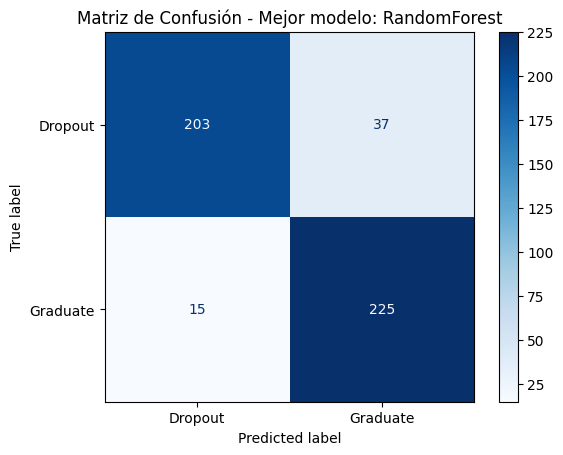

Modelo guardado como 'best_model.joblib'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# --- Cargar datos ---
data = pd.read_csv('Data_fil_resultstransformed_data.csv')
print(f"Dataset cargado: {data.shape[0]} muestras, {data.shape[1]-1} características.")

X = data.drop(columns=['target'])  # Cambia 'target' por el nombre real de tu columna objetivo
y = data['target']

# --- División 70% entrenamiento, 30% prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Datos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# --- Clasificadores ---
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier()
}

# --- Rejillas de hiperparámetros ---
param_grids = {
    'LogisticRegression': {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs', 'saga']
    },
    'RandomForest': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [5, 10, 15],
        'clf__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    'KNeighbors': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    }
}

results_summary = []

for name, clf in classifiers.items():
    print(f"\n--- Ejecutando GridSearch para: {name} ---")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=param_grids[name],
        scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro'},
        refit='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X_train, y_train)

    # Mostrar mejores resultados
    best_acc = grid.best_score_
    best_params = grid.best_params_

    # Obtener el mejor F1-macro asociado al mejor índice
    best_index = grid.best_index_
    best_f1_macro = grid.cv_results_['mean_test_f1_macro'][best_index]

    print(f"Mejor Accuracy para {name}: {best_acc:.4f}")
    print(f"Mejor F1-macro para {name}: {best_f1_macro:.4f}")
    print(f"Mejores parámetros: {best_params}")

    # Guardar resumen para comparar luego
    results_summary.append({
        'name': name,
        'best_accuracy': best_acc,
        'best_f1_macro': best_f1_macro,
        'best_params': best_params,
        'best_estimator': grid.best_estimator_
    })

    # Mostrar tabla completa de resultados de la rejilla
    results_df = pd.DataFrame(grid.cv_results_)
    cols_to_show = ['params', 'mean_test_accuracy', 'mean_test_f1_macro']
    results_df_to_print = results_df[cols_to_show].sort_values(by='mean_test_accuracy', ascending=False)

    print(f"\nResultados completos para {name}:")
    print(results_df_to_print.to_string(index=False))

    # Guardar resultados completos a CSV
    results_df_to_print.to_csv(f'resultados_grid_{name}.csv', index=False)

# Ordenar modelos por mejor accuracy
results_summary = sorted(results_summary, key=lambda x: x['best_accuracy'], reverse=True)

print("\n--- Resumen de resultados (ordenado por Accuracy) ---")
for r in results_summary:
    print(f"{r['name']:15} | Accuracy: {r['best_accuracy']:.4f} | F1-macro: {r['best_f1_macro']:.4f} | Params: {r['best_params']}")

# Mejor modelo global
best_model_info = results_summary[0]
best_model = best_model_info['best_estimator']
print(f"\nMejor modelo global: {best_model_info['name']} con Accuracy {best_model_info['best_accuracy']:.4f}")

# Evaluación en el conjunto de prueba
y_pred = best_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, average='macro')
print(f"\nEvaluación en conjunto de prueba:")
print(f"Accuracy: {acc_test:.4f}")
print(f"F1-macro: {f1_test:.4f}")

# Matriz de confusión en test
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Mejor modelo: {best_model_info["name"]}')
plt.show()

# Guardar modelo final
joblib.dump(best_model, 'best_model.joblib')
print("Modelo guardado como 'best_model.joblib'")

# PRUEBA CON MODELO OBTENIDO

Gen 1/50: Mejor Accuracy = 0.8854
Gen 2/50: Mejor Accuracy = 0.8854
Gen 3/50: Mejor Accuracy = 0.8896
Gen 4/50: Mejor Accuracy = 0.8896
Gen 5/50: Mejor Accuracy = 0.8896
Gen 6/50: Mejor Accuracy = 0.8896
Gen 7/50: Mejor Accuracy = 0.8896
Gen 8/50: Mejor Accuracy = 0.8958
Gen 9/50: Mejor Accuracy = 0.8896
Gen 10/50: Mejor Accuracy = 0.8896
Gen 11/50: Mejor Accuracy = 0.8896
Gen 12/50: Mejor Accuracy = 0.8917
Gen 13/50: Mejor Accuracy = 0.8917
Gen 14/50: Mejor Accuracy = 0.8917
Gen 15/50: Mejor Accuracy = 0.8917
Gen 16/50: Mejor Accuracy = 0.8917
Gen 17/50: Mejor Accuracy = 0.8979
Gen 18/50: Mejor Accuracy = 0.8979
Gen 19/50: Mejor Accuracy = 0.9042
Gen 20/50: Mejor Accuracy = 0.9042
Gen 21/50: Mejor Accuracy = 0.9042
Gen 22/50: Mejor Accuracy = 0.9042
Gen 23/50: Mejor Accuracy = 0.9042
Gen 24/50: Mejor Accuracy = 0.9042
Gen 25/50: Mejor Accuracy = 0.9042
Gen 26/50: Mejor Accuracy = 0.9042
Gen 27/50: Mejor Accuracy = 0.9042
Gen 28/50: Mejor Accuracy = 0.9042
Gen 29/50: Mejor Accuracy = 0

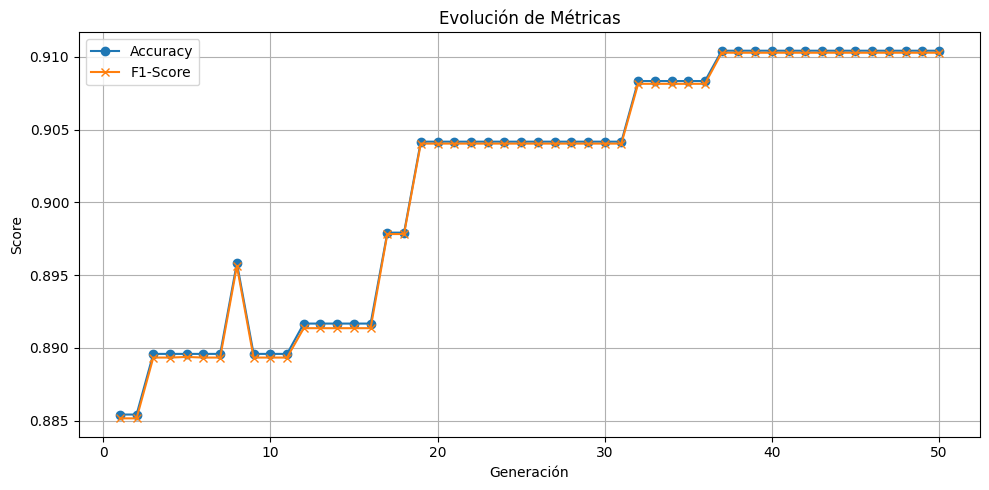


✅ Matriz de Confusión del Mejor Subconjunto:
[[208  30]
 [ 13 229]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

     Dropout       0.94      0.87      0.91       238
    Graduate       0.88      0.95      0.91       242

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



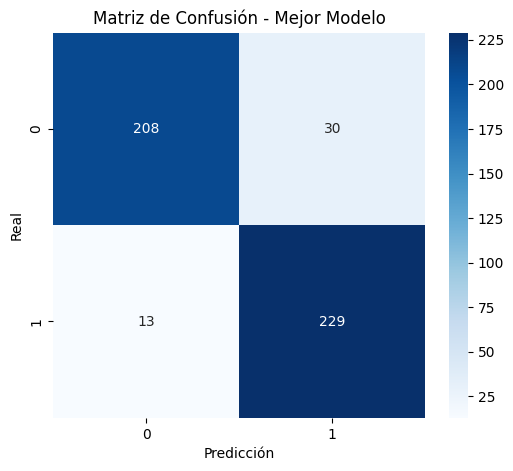


🔝 Top 5 subconjuntos con mayor accuracy:
     generation  accuracy  f1_score  subset_size
175          44  0.910417  0.910278           10
174          44  0.910417  0.910278           10
173          44  0.910417  0.910278           10
172          44  0.910417  0.910278           10
171          43  0.910417  0.910278           10

Características seleccionadas en los 5 mejores subconjuntos ordenadas por frecuencia:
feature_30: 5 veces
feature_23: 5 veces
feature_14: 5 veces
feature_11: 5 veces
feature_16: 5 veces
feature_3: 5 veces
feature_7: 5 veces
feature_13: 5 veces
feature_22: 5 veces
feature_15: 5 veces


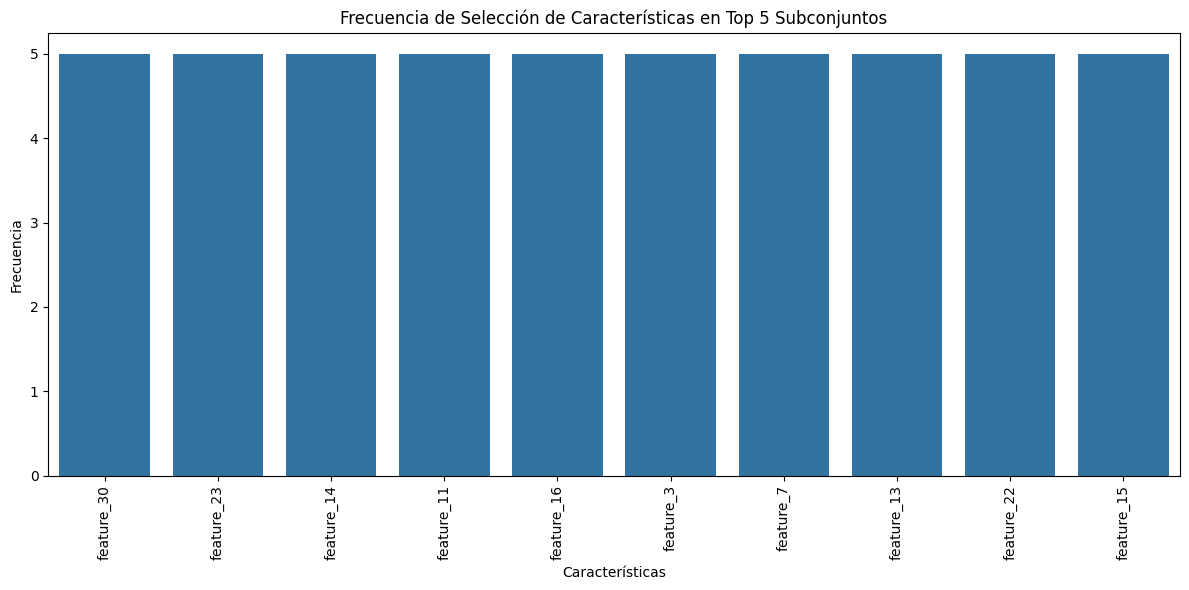

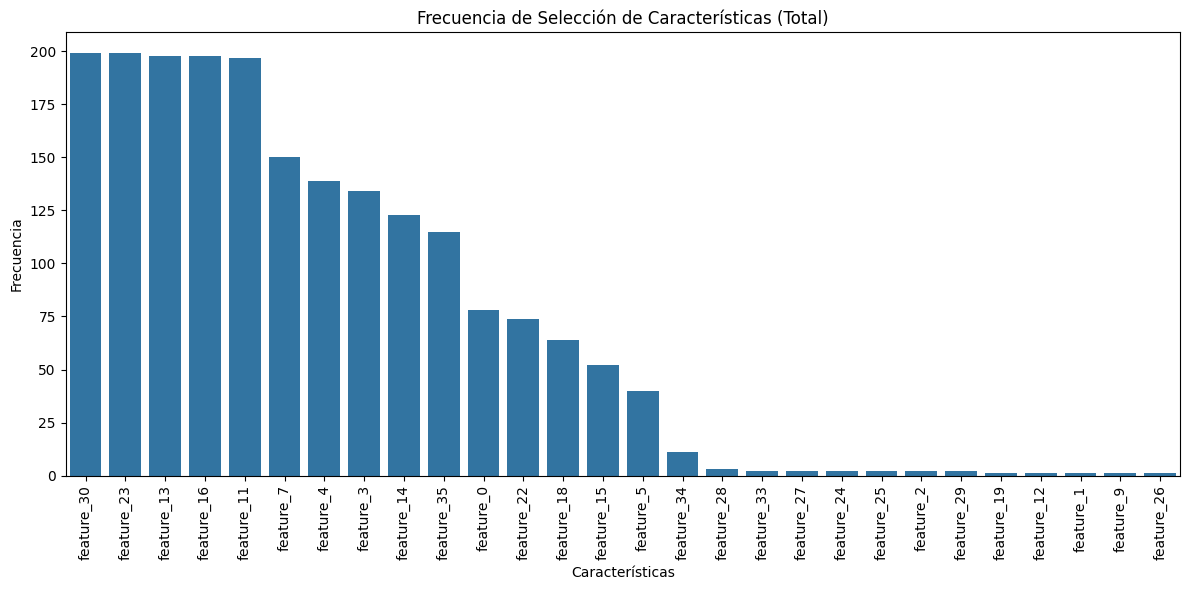


✅ Mejor subconjunto de características:
Accuracy: 0.9104
Características seleccionadas (ordenadas por frecuencia global):
[np.str_('feature_30'), np.str_('feature_23'), np.str_('feature_16'), np.str_('feature_13'), np.str_('feature_11'), 'feature_7', 'feature_3', 'feature_14', 'feature_22', 'feature_15']

📊 Tabla de resultados acumulados:
   experiment_id    classifier  max_accuracy  mean_accuracy  mean_f1_score  \
0              1  RandomForest      0.910417        0.90075       0.900562   

   mean_subset_size  total_generations  
0             9.955                200  


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# === CONFIGURACIÓN DEL EXPERIMENTO ===
config = {
    "experiment_id": 1,
    "num_generations": 50,
    "population_size": 20,
    "subset_size_range": (5, 10),
    "elite_fraction": 0.2,
    "mutation_rate": 0.3,
    "classifier_name": "RandomForest",  # Cambiado a mejor modelo obtenido
    "random_state": 42
}

# === CARGA DE DATOS ===
data_file = "Data_fil_resultstransformed_data.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"El archivo {data_file} no se encuentra en el directorio actual.")

df = pd.read_csv(data_file)
X = df.drop("target", axis=1)
y = df["target"]
feature_names = list(X.columns)

# === CARGA DE HISTORIAL DE RESULTADOS ===
history_file = "graper_results_history.csv"
if os.path.exists(history_file):
    history_df = pd.read_csv(history_file)
    last_experiment_id = history_df["experiment_id"].max() + 1
else:
    history_df = pd.DataFrame()
    last_experiment_id = config["experiment_id"]
config["experiment_id"] = last_experiment_id

# === CLASIFICADOR ===
def get_classifier(name, seed=42):
    if name == "RandomForest":
        # Parámetros ajustados ejemplo; poner los que conseguiste en rejilla
        return RandomForestClassifier(n_estimators=200, max_depth=10, random_state=seed)
    elif name == "SVM":
        return SVC(kernel='rbf', probability=True, random_state=seed)
    elif name == "LogisticRegression":
        return LogisticRegression(max_iter=1000, random_state=seed)
    elif name == "KNN":
        return KNeighborsClassifier(n_neighbors=7)
    elif name == "DecisionTree":
        return DecisionTreeClassifier(random_state=seed)
    elif name == "ExtraTrees":
        return ExtraTreesClassifier(n_estimators=100, random_state=seed)
    elif name == "NaiveBayes":
        return GaussianNB()
    elif name == "MLP":
        return MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed)
    elif name == "QDA":
        return QuadraticDiscriminantAnalysis()
    else:
        raise ValueError("Clasificador no reconocido")

# === EVALUACIÓN ===
def evaluate_subset(features, classifier):
    # Usar 70% entrenamiento, 30% prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], y, test_size=0.3, random_state=config["random_state"]
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1, y_test, y_pred

# === POBLACIÓN INICIAL ===
def generate_population(prob_dist, size):
    population = []
    for _ in range(size):
        subset_size = random.randint(*config["subset_size_range"])
        selected = np.random.choice(feature_names, size=subset_size, replace=False, p=prob_dist)
        population.append(list(selected))
    return population

def mutate(subset):
    mutated = subset.copy()
    if random.random() < config["mutation_rate"]:
        idx_to_replace = random.randint(0, len(mutated)-1)
        new_feature = random.choice([f for f in feature_names if f not in mutated])
        mutated[idx_to_replace] = new_feature
    return mutated

initial_prob = np.ones(len(feature_names)) / len(feature_names)
population = generate_population(initial_prob, config["population_size"])
results = []
accuracy_history = []
f1_history = []
best_y_test, best_y_pred = None, None

# === EVOLUCIÓN ===
for gen in range(config["num_generations"]):
    gen_results = []
    for subset in population:
        # Filtrado con NaiveBayes para descartar malas combinaciones
        acc_nb, _, _, _ = evaluate_subset(subset, GaussianNB())
        if acc_nb < 0.5:
            continue

        clf = get_classifier(config["classifier_name"], config["random_state"])
        acc_rf, f1_rf, y_test, y_pred = evaluate_subset(subset, clf)

        gen_results.append({
            "experiment_id": config["experiment_id"],
            "generation": gen + 1,
            "features": subset,
            "accuracy": acc_rf,
            "f1_score": f1_rf,
            "subset_size": len(subset),
            "classifier": config["classifier_name"]
        })

    if not gen_results:
        continue

    gen_results.sort(key=lambda x: x["accuracy"], reverse=True)
    elite_count = max(1, int(config["elite_fraction"] * len(gen_results)))
    elites = gen_results[:elite_count]
    results.extend(elites)

    accuracy_history.append(elites[0]["accuracy"])
    f1_history.append(elites[0]["f1_score"])

    if elites[0]["accuracy"] >= max(accuracy_history):
        best_y_test, best_y_pred = y_test, y_pred

    print(f"Gen {gen+1}/{config['num_generations']}: Mejor Accuracy = {elites[0]['accuracy']:.4f}")

    # Actualizar distribución de probabilidad según frecuencia de features en elites
    feature_counter = Counter()
    for elite in elites:
        feature_counter.update(elite["features"])
    total = sum(feature_counter.values())
    prob_dist = np.array([feature_counter.get(f, 0) / total for f in feature_names])

    new_population = []
    while len(new_population) < config["population_size"]:
        base_subset = random.choice(elites)["features"]
        mutated_subset = mutate(base_subset)
        new_population.append(mutated_subset)
    population = new_population

# === RESULTADOS ===
results_df = pd.DataFrame(results)

# Graficar evolución accuracy y f1
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_history)+1), accuracy_history, label="Accuracy", marker="o")
plt.plot(range(1, len(f1_history)+1), f1_history, label="F1-Score", marker="x")
plt.xlabel("Generación")
plt.ylabel("Score")
plt.title("Evolución de Métricas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir matriz de confusión y reporte clasificación del mejor resultado
if best_y_test is not None and best_y_pred is not None:
    print("\n✅ Matriz de Confusión del Mejor Subconjunto:")
    cm = confusion_matrix(best_y_test, best_y_pred)
    print(cm)
    print("\n📋 Reporte de Clasificación:")
    print(classification_report(best_y_test, best_y_pred))

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión - Mejor Modelo")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Mostrar top 5 mejores subconjuntos ordenados por accuracy
top_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("\n🔝 Top 5 subconjuntos con mayor accuracy:")
print(top_results[["generation", "accuracy", "f1_score", "subset_size"]])

# Contar frecuencia de características en top 5 subconjuntos
top_features_counter = Counter()
for features_list in top_results["features"]:
    top_features_counter.update(features_list)

print("\nCaracterísticas seleccionadas en los 5 mejores subconjuntos ordenadas por frecuencia:")
for feat, freq in top_features_counter.most_common():
    print(f"{feat}: {freq} veces")

plt.figure(figsize=(12, 6))
top_freq_df = pd.DataFrame.from_dict(top_features_counter, orient='index', columns=["frequency"])
top_freq_df = top_freq_df.sort_values(by="frequency", ascending=False)
sns.barplot(x=top_freq_df.index, y="frequency", data=top_freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características en Top 5 Subconjuntos")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Frecuencia total de características en todos los resultados
feature_counter = Counter()
for row in results_df["features"]:
    feature_counter.update(row)

freq_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_df.index, y="frequency", data=freq_df)
plt.xticks(rotation=90)
plt.title("Frecuencia de Selección de Características (Total)")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

best_result = results_df.loc[results_df['accuracy'].idxmax()]
print("\n✅ Mejor subconjunto de características:")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print("Características seleccionadas (ordenadas por frecuencia global):")

best_feats = best_result['features']
best_feats_sorted = sorted(best_feats, key=lambda f: feature_counter.get(f, 0), reverse=True)
print(best_feats_sorted)

summary = results_df.groupby("experiment_id").agg({
    "classifier": "first",
    "accuracy": ["max", "mean"],
    "f1_score": "mean",
    "subset_size": "mean",
    "generation": "count"
}).reset_index()

summary.columns = [
    "experiment_id", "classifier", "max_accuracy", "mean_accuracy",
    "mean_f1_score", "mean_subset_size", "total_generations"
]

print("\n📊 Tabla de resultados acumulados:")
print(summary)

history_df = pd.concat([history_df, results_df], ignore_index=True)
history_df.to_csv(history_file, index=False)